In [1]:

import time      # for testing use only
import os         # for testing use only

import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import requests 
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300




from tqdm.notebook import tqdm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

warnings.simplefilter("ignore")

%matplotlib inline

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Load the dataset

In [2]:


df2=pd.read_csv("car_before_clean.csv")


In [3]:
df2

,year,make,model,km,accident,owner,use,color,price
0,2018,Land Rover,Discovery Sport,"64,126",No accidents,2 Owners,Personal use,Silver,"$22,288"
1,2017,Chevrolet,Cruze,"119,174",No accidents,2 Owners,Personal use,Blue,"$14,999"
2,2007,Porsche,Cayman,"15,565",No accidents,2 Owners,Personal use,White,"$43,998"
3,2019,Chevrolet,Equinox,"36,179",No accidents,1 Owner,Personal use,White,"$18,900"
4,2020,Toyota,Corolla,"60,821",No accidents,1 Owner,Personal use,Black,"$16,823"
...,...,...,...,...,...,...,...,...,...
6598,2018,GMC,Sierra 1500,"32,048",No accidents,1 Owner,Personal use,White,"$40,386"
6599,2019,Dodge,Grand Caravan,"70,527",No accidents,1 Owner,Personal use,Silver,"$18,995"
6600,2004,Toyota,Camry Solara,"111,089",1 accident,3 Owners,Personal use,White,"$6,999"
6601,2014,Volkswagen,Passat,"98,583",No accidents,1 Owner,Personal use,Gray,"$9,998"


# Treat missing data

In [4]:

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      6603 non-null   int64 
 1   make      6603 non-null   object
 2   model     6603 non-null   object
 3   km        6603 non-null   object
 4   accident  6603 non-null   object
 5   owner     6603 non-null   object
 6   use       6603 non-null   object
 7   color     6603 non-null   object
 8   price     6603 non-null   object
dtypes: int64(1), object(8)
memory usage: 464.4+ KB


# Treat duplicated data

In [5]:


print(f"count of line that exactly the same: {df2.duplicated().sum()}")
df2=df2.drop_duplicates()



count of line that exactly the same: 139


In [6]:
print(f"count of line that exactly the same after deal with duplicated: {df2.duplicated().sum()}")

count of line that exactly the same after deal with duplicated: 0


# Correcting unnecessary information in some columns

In [7]:

df2.owner.unique()

array([' 2 Owners', ' 1 Owner', ' 3 Owners', ' 0 Owners', ' 4 Owners',
       ' 5 Owners', ' 7 Owners', ' 6 Owners', ' 8 Owners', ' 12 Owners'],
      dtype=object)

In [8]:
replace_map={'2 Owners':2, ' 1 Owner':1, ' 3 Owners':3, ' 0 Owners':0, ' 4 Owners':4,
       ' 5 Owners':5, ' 7 Owners':7, ' 6 Owners':6, ' 8 Owners':8, ' 12 Owners':12, ' 2 Owners':2}
df2.replace(replace_map,inplace=True)

In [9]:
df2.accident.unique()

array(['No accidents', '1 accident', '2 accidents', '3 accidents'],
      dtype=object)

In [10]:
replace_map={'No accidents':0, '1 accident':1, '2 accidents':2, '3 accidents':3}
df2.replace(replace_map,inplace=True)

# check 

In [11]:
print(df2.owner.unique())
print(df2.accident.unique())


[ 2  1  3  0  4  5  7  6  8 12]
[0 1 2 3]


In [12]:
df2

,year,make,model,km,accident,owner,use,color,price
0,2018,Land Rover,Discovery Sport,"64,126",0,2,Personal use,Silver,"$22,288"
1,2017,Chevrolet,Cruze,"119,174",0,2,Personal use,Blue,"$14,999"
2,2007,Porsche,Cayman,"15,565",0,2,Personal use,White,"$43,998"
3,2019,Chevrolet,Equinox,"36,179",0,1,Personal use,White,"$18,900"
4,2020,Toyota,Corolla,"60,821",0,1,Personal use,Black,"$16,823"
...,...,...,...,...,...,...,...,...,...
6598,2018,GMC,Sierra 1500,"32,048",0,1,Personal use,White,"$40,386"
6599,2019,Dodge,Grand Caravan,"70,527",0,1,Personal use,Silver,"$18,995"
6600,2004,Toyota,Camry Solara,"111,089",1,3,Personal use,White,"$6,999"
6601,2014,Volkswagen,Passat,"98,583",0,1,Personal use,Gray,"$9,998"


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6464 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      6464 non-null   int64 
 1   make      6464 non-null   object
 2   model     6464 non-null   object
 3   km        6464 non-null   object
 4   accident  6464 non-null   int64 
 5   owner     6464 non-null   int64 
 6   use       6464 non-null   object
 7   color     6464 non-null   object
 8   price     6464 non-null   object
dtypes: int64(3), object(6)
memory usage: 505.0+ KB


# Convert some of the colums to int

In [14]:


df2['year'] = df2['year'].astype('int')
df2['km'] = df2['km'].str.replace(',','') 
df2['km'] = df2['km'].astype('int')
df2['price'] = df2['price'].str.replace('$','')
df2['price'] = df2['price'].str.replace(',','') 
df2['price'] = df2['price'].astype('int')

# checking data frame again

In [15]:
df2

,year,make,model,km,accident,owner,use,color,price
0,2018,Land Rover,Discovery Sport,64126,0,2,Personal use,Silver,22288
1,2017,Chevrolet,Cruze,119174,0,2,Personal use,Blue,14999
2,2007,Porsche,Cayman,15565,0,2,Personal use,White,43998
3,2019,Chevrolet,Equinox,36179,0,1,Personal use,White,18900
4,2020,Toyota,Corolla,60821,0,1,Personal use,Black,16823
...,...,...,...,...,...,...,...,...,...
6598,2018,GMC,Sierra 1500,32048,0,1,Personal use,White,40386
6599,2019,Dodge,Grand Caravan,70527,0,1,Personal use,Silver,18995
6600,2004,Toyota,Camry Solara,111089,1,3,Personal use,White,6999
6601,2014,Volkswagen,Passat,98583,0,1,Personal use,Gray,9998


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6464 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      6464 non-null   int32 
 1   make      6464 non-null   object
 2   model     6464 non-null   object
 3   km        6464 non-null   int32 
 4   accident  6464 non-null   int64 
 5   owner     6464 non-null   int64 
 6   use       6464 non-null   object
 7   color     6464 non-null   object
 8   price     6464 non-null   int32 
dtypes: int32(3), int64(2), object(4)
memory usage: 429.2+ KB


# ויזואליזציה EDA

# משתנים רציפים-ויזואליזציות חד ממדיות


# טיפול בחריגים

<AxesSubplot:xlabel='year'>

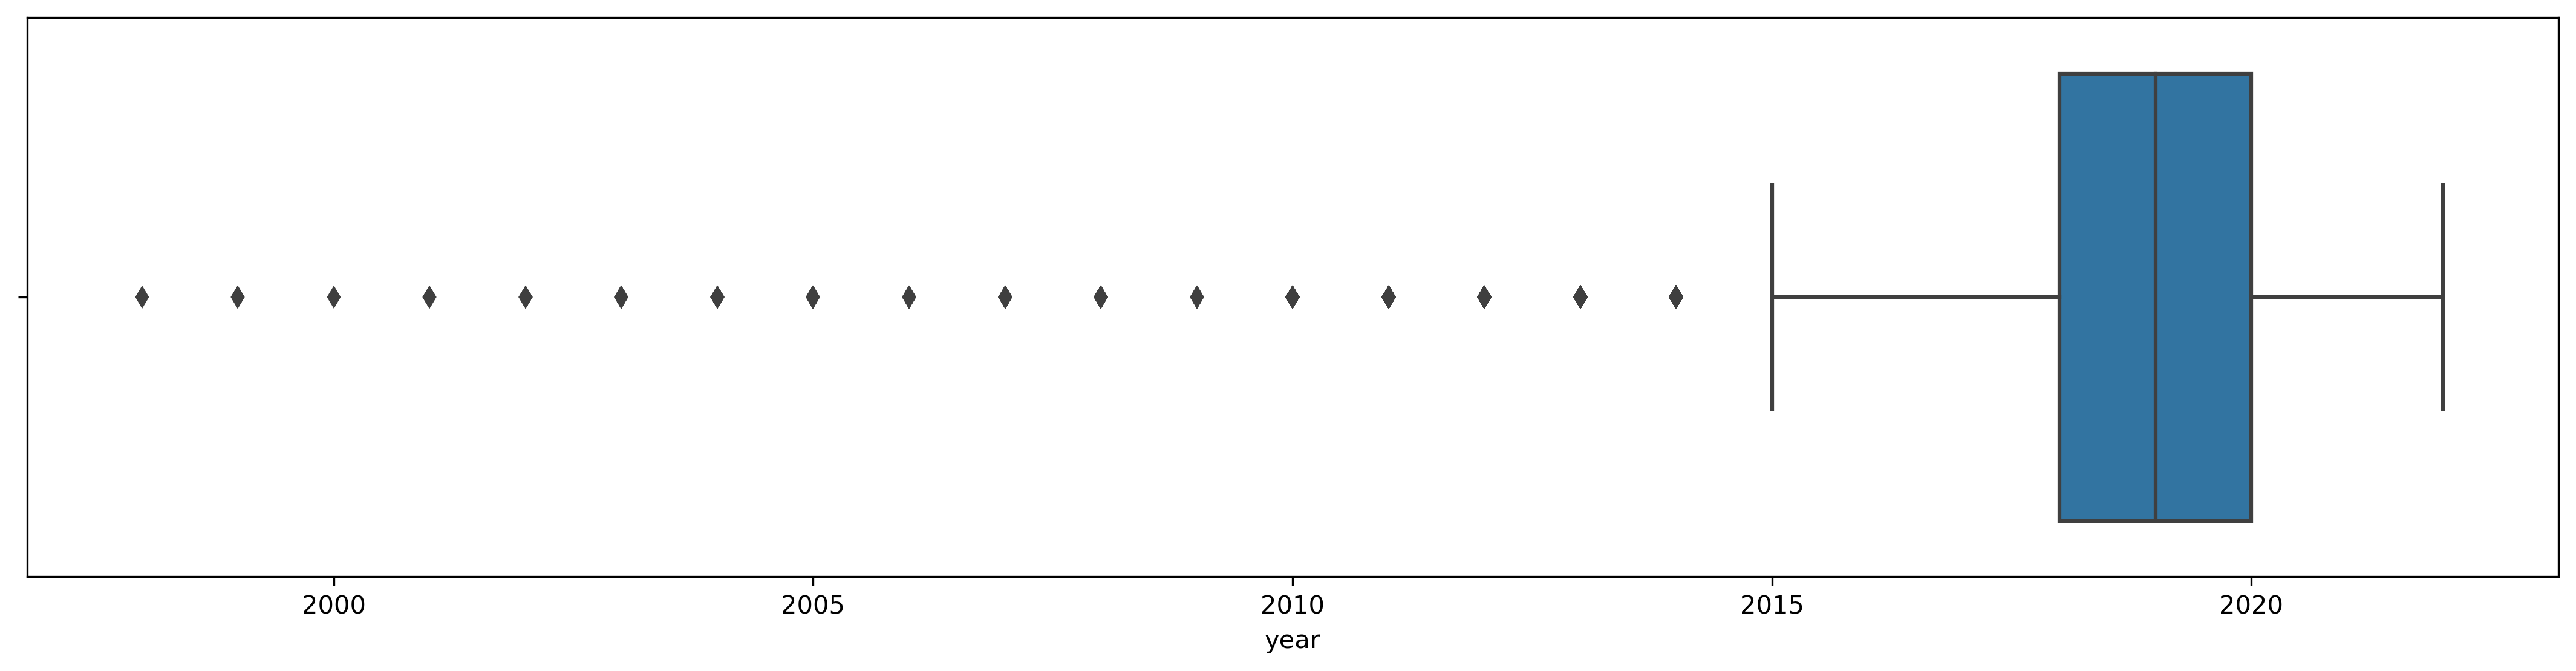

In [17]:
#year
fig=plt.figure(figsize=(18,4))
sns.boxplot(df2.year)

<AxesSubplot:xlabel='km'>

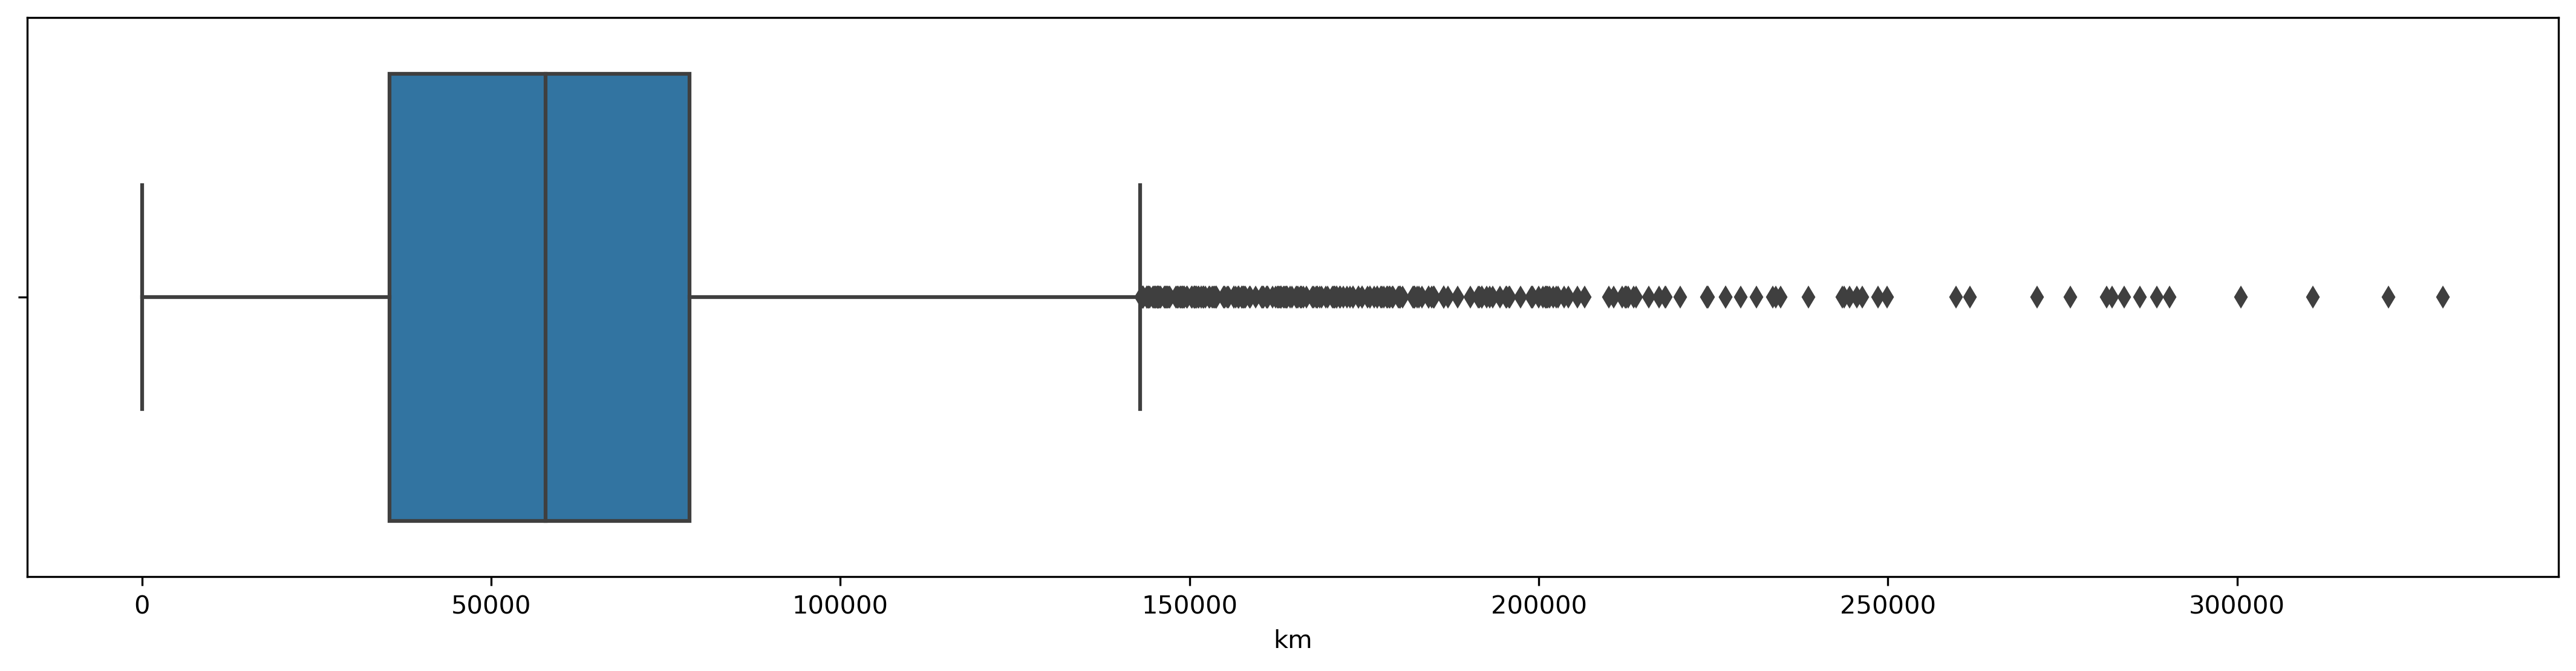

In [18]:
#km
fig=plt.figure(figsize=(18,4))
sns.boxplot(df2.km)

<AxesSubplot:xlabel='price'>

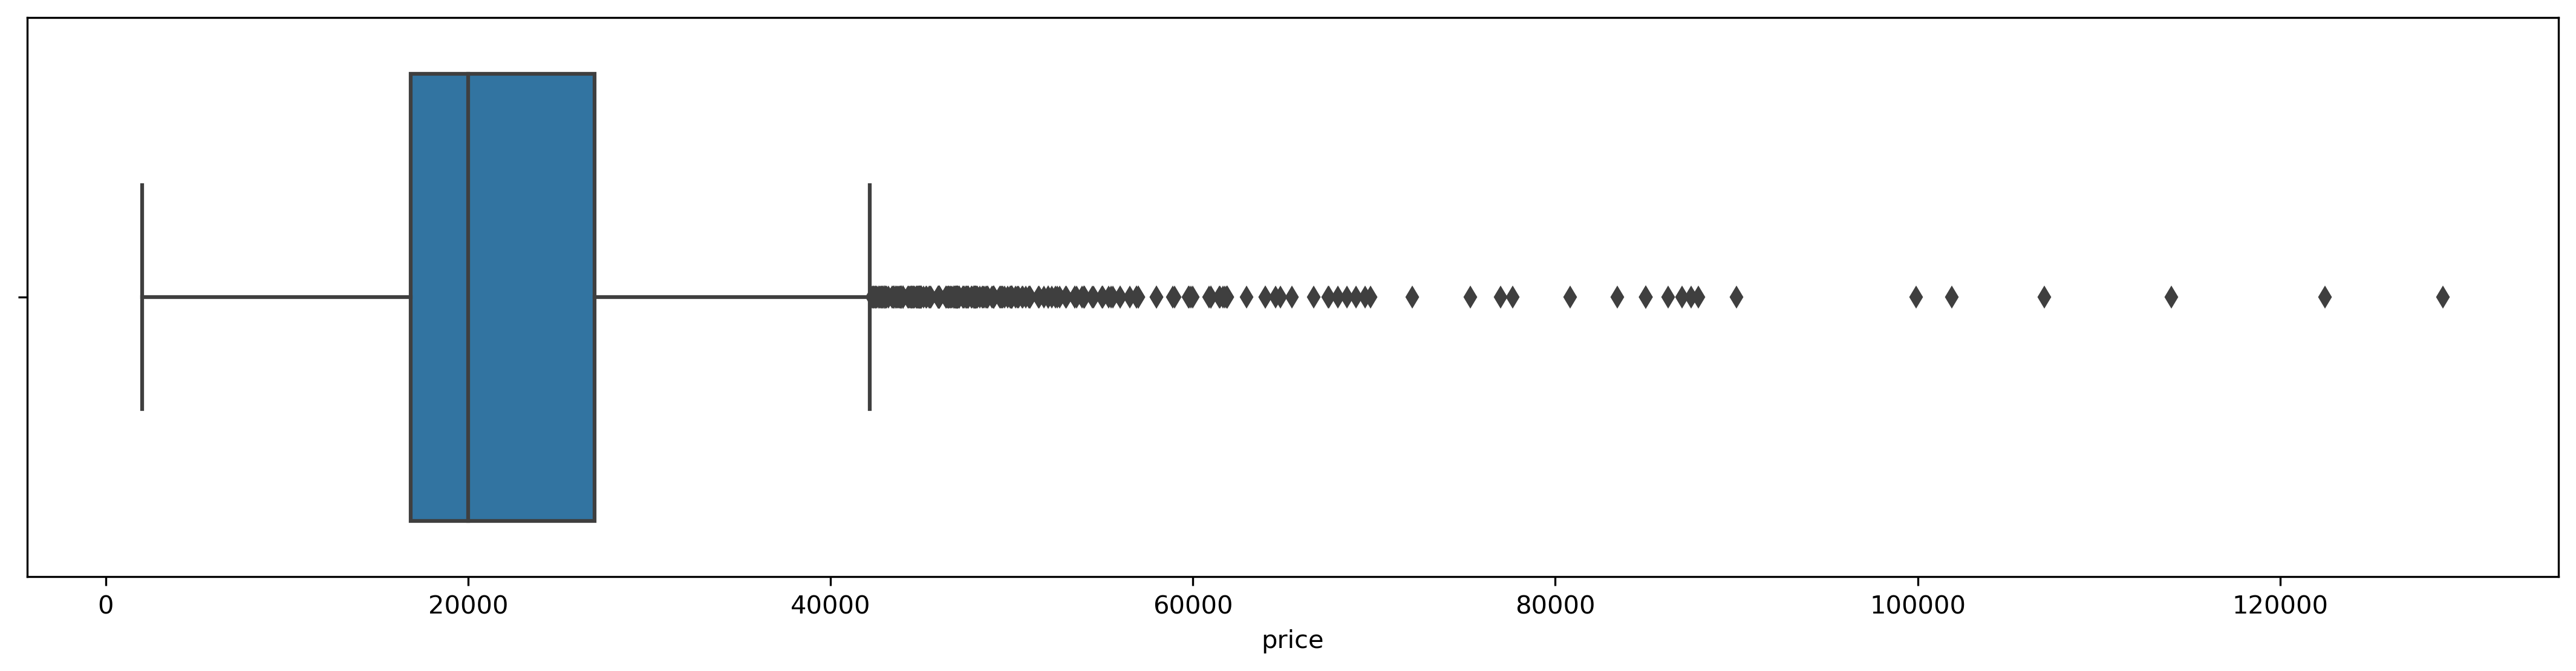

In [19]:
#price
fig=plt.figure(figsize=(18,4))
sns.boxplot(df2.price)


(array([   4.,    4.,    6.,   19.,   12.,   26.,   28.,   34.,  123.,
         169.,  462.,  582.,  569., 3503.,  923.]),
 array([1998. , 1999.6, 2001.2, 2002.8, 2004.4, 2006. , 2007.6, 2009.2,
        2010.8, 2012.4, 2014. , 2015.6, 2017.2, 2018.8, 2020.4, 2022. ]),
 <BarContainer object of 15 artists>)

Text(0.5, 1.0, 'year histogram')

Text(0.5, 0, 'year')

Text(0, 0.5, 'Frequency')

(array([ 767., 1481., 1869., 1014.,  557.,  421.,  161.,   81.,   50.,
          30.,   12.,    9.,    5.,    4.,    3.]),
 array([5.00000000e+00, 2.19713333e+04, 4.39376667e+04, 6.59040000e+04,
        8.78703333e+04, 1.09836667e+05, 1.31803000e+05, 1.53769333e+05,
        1.75735667e+05, 1.97702000e+05, 2.19668333e+05, 2.41634667e+05,
        2.63601000e+05, 2.85567333e+05, 3.07533667e+05, 3.29500000e+05]),
 <BarContainer object of 15 artists>)

Text(0.5, 1.0, 'km histogram')

Text(0.5, 0, 'km')

Text(0, 0.5, 'Frequency')

(array([4.870e+02, 2.127e+03, 2.287e+03, 9.100e+02, 3.960e+02, 1.800e+02,
        3.500e+01, 2.000e+01, 5.000e+00, 7.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00]),
 array([  2000.        ,  10466.66666667,  18933.33333333,  27400.        ,
         35866.66666667,  44333.33333333,  52800.        ,  61266.66666667,
         69733.33333333,  78200.        ,  86666.66666667,  95133.33333333,
        103600.        , 112066.66666667, 120533.33333333, 129000.        ]),
 <BarContainer object of 15 artists>)

Text(0.5, 1.0, 'price histogram')

Text(0.5, 0, 'price')

Text(0, 0.5, 'Frequency')

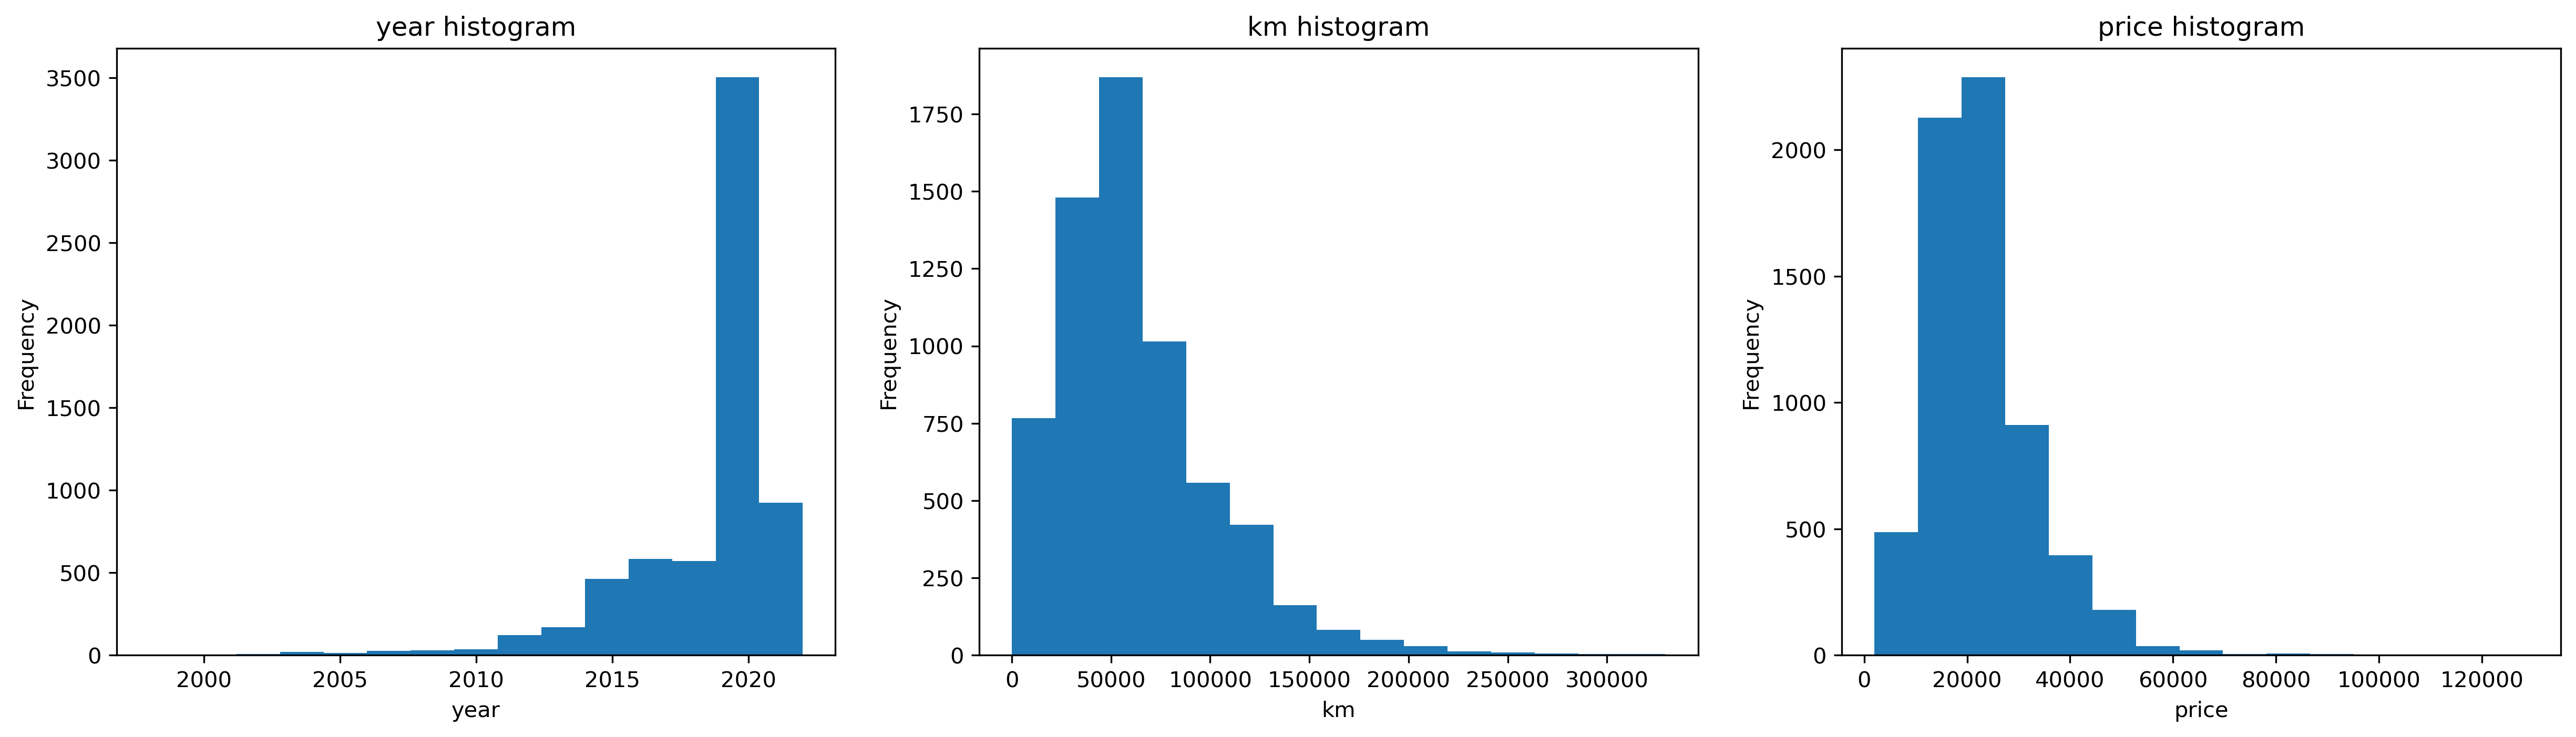

In [20]:
### using figure object and creating subplots
fig = plt.figure(figsize=(20, 5))

# create a subplot in a 1 by 2 grid, and return subplot specified in third parameter
fig1 = fig.add_subplot(1,3,1) # rows, columns, index_num
fig2 = fig.add_subplot(1,3,2)
fig3 =fig.add_subplot(1,3,3)


fig1.hist(df2.year,bins=15)
fig1.set_title('year histogram')
fig1.set_xlabel('year')
fig1.set_ylabel('Frequency')

fig2.hist(df2.km,bins=15)
fig2.set_title('km histogram')
fig2.set_xlabel('km')
fig2.set_ylabel('Frequency')

fig3.hist(df2.price,bins=15)
fig3.set_title('price histogram')
fig3.set_xlabel('price')
fig3.set_ylabel('Frequency')


In [21]:
df2["km"].describe()

count      6464.000000
mean      62653.100712
std       39611.593347
min           5.000000
25%       35418.250000
50%       57778.000000
75%       78421.250000
max      329500.000000
Name: km, dtype: float64

In [22]:
# min=5 :Need to be treat(maybe supposed to be in thousands) 
#max=329500 : Makes sense

In [23]:
df2["price"].describe()

count      6464.000000
mean      22609.508818
std       10425.704898
min        2000.000000
25%       16820.250000
50%       19998.500000
75%       26991.250000
max      129000.000000
Name: price, dtype: float64

In [24]:
#min=2000 : Makes sense
#max=129000 : Makes sense

In [25]:
df2["year"].describe()

count    6464.000000
mean     2018.478496
std         2.861359
min      1998.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2022.000000
Name: year, dtype: float64

In [26]:
#min=1998 : Makes sense
#max=2022: Makes sense

# Treat km column

# I Decide to treat all the value that is less than 400 km because I think that maybe they supposed to be in thousands) 

In [27]:
sum(df2.km<400)

11

In [28]:

df2.km[df2.km<400] = np.nan

In [29]:
#2
#Q1 = np.percentile(df2["km"], 25)
#Q3 = np.percentile(df2["km"], 75)
#IQR = Q3 - Q1

In [30]:
#df2.km[(df2["km"] < Q1 - 1.5*IQR) | (df2["km"] > Q3 + 1.5*IQR )] = np.nan

In [31]:
df2.km.count()

6453

In [32]:
df2.isnull().sum()

year         0
make         0
model        0
km          11
accident     0
owner        0
use          0
color        0
price        0
dtype: int64

In [33]:
df2=df2.dropna(axis=0)

In [34]:
df2.isnull().sum()

year        0
make        0
model       0
km          0
accident    0
owner       0
use         0
color       0
price       0
dtype: int64

In [35]:

df2["km"].describe()

count      6453.000000
mean      62759.668836
std       39561.075991
min         500.000000
25%       35526.000000
50%       57863.000000
75%       78447.000000
max      329500.000000
Name: km, dtype: float64

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6453 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      6453 non-null   int32  
 1   make      6453 non-null   object 
 2   model     6453 non-null   object 
 3   km        6453 non-null   float64
 4   accident  6453 non-null   int64  
 5   owner     6453 non-null   int64  
 6   use       6453 non-null   object 
 7   color     6453 non-null   object 
 8   price     6453 non-null   int32  
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 453.7+ KB


In [37]:
df2.shape #6334*9= 59,706 

(6453, 9)

# משתנים בדידים-ויזואליזציות חד ממדיות

<Figure size 3000x2100 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'make distribution')

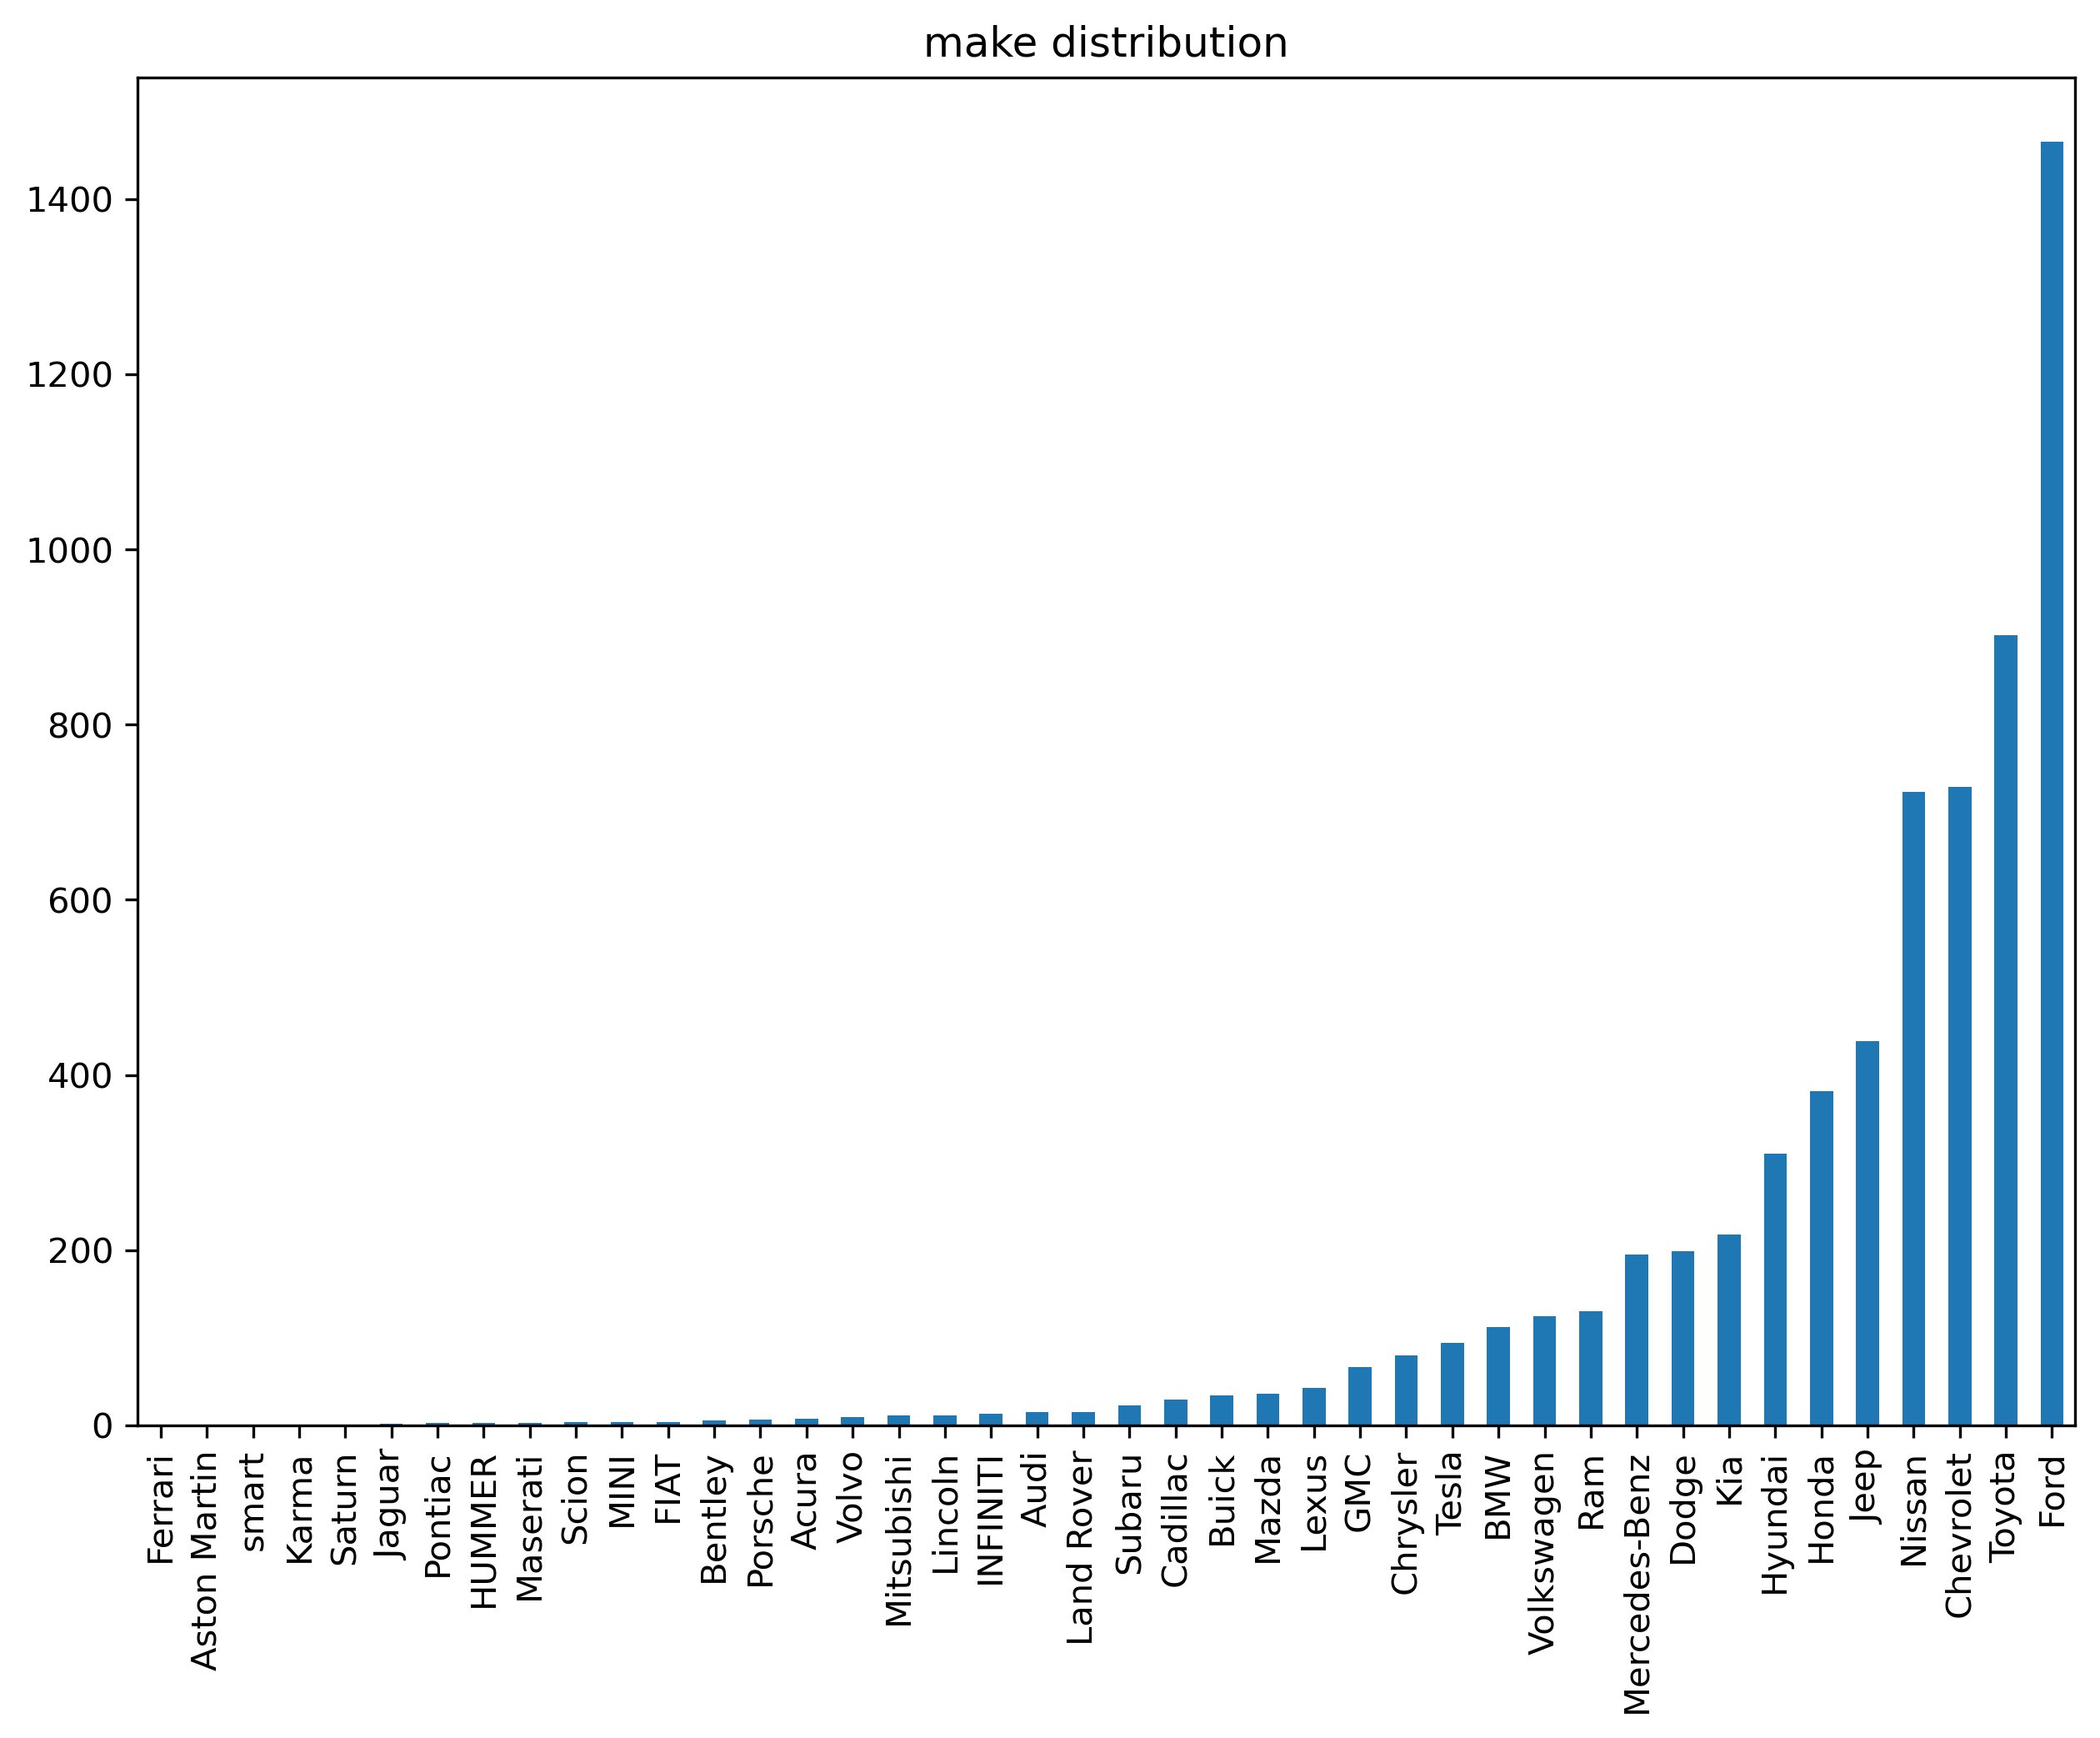

In [38]:
#categorial:
plt.figure(figsize=(10,7))
df2['make'].value_counts().sort_values().plot(kind='bar')
plt.title('make distribution')

In [39]:
#categorial:
#plt.figure(figsize=(40,7))
#df2['model'].value_counts().sort_values().plot(kind='bar')
#plt.title('model distribution')

<Figure size 600x600 with 0 Axes>

<AxesSubplot:ylabel='use'>

Text(0.5, 1.0, 'use distibution')

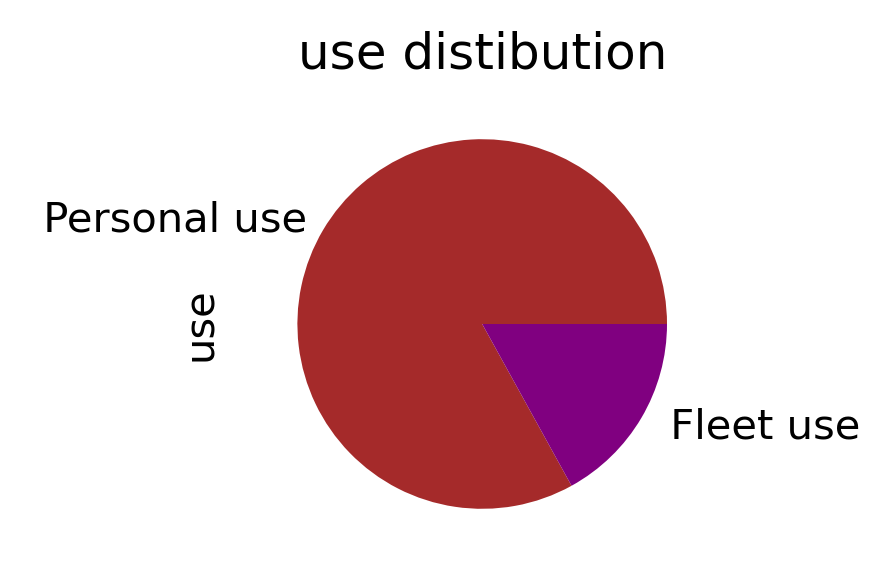

In [40]:
plt.figure(figsize=(2,2))
df2["use"].value_counts().plot(kind='pie', colors = ['brown', 'purple', 'navy'])
plt.title('use distibution')

<Figure size 1500x900 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'owner distribution')

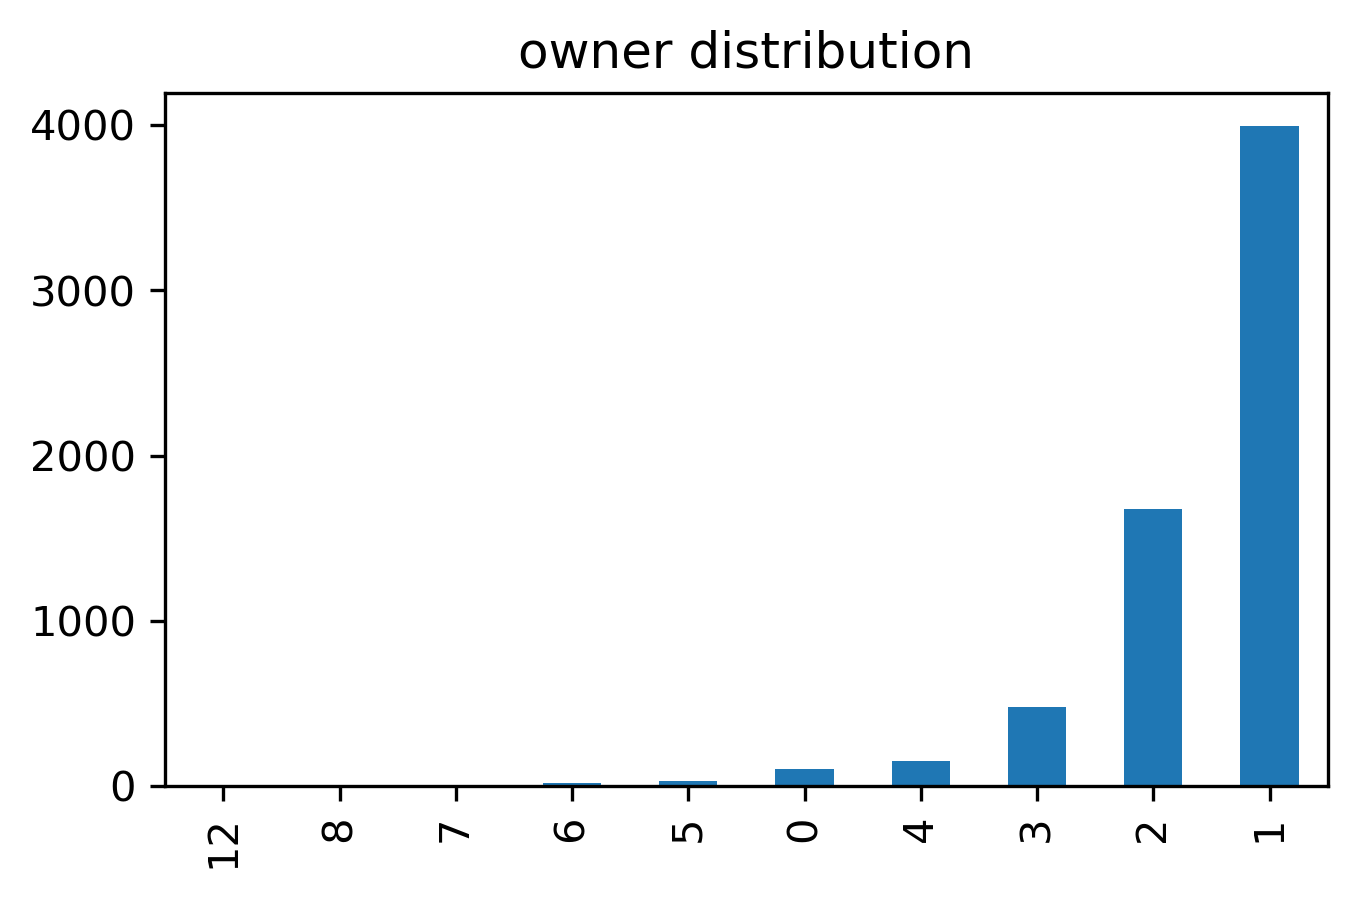

In [41]:
plt.figure(figsize=(5,3))
df2['owner'].value_counts().sort_values().plot(kind='bar')
plt.title('owner distribution')

In [42]:
df2.owner[df2.owner==0] = np.nan # The research is just about used cars.

In [43]:
df2.isnull().sum() ##need to be treat

year          0
make          0
model         0
km            0
accident      0
owner       100
use           0
color         0
price         0
dtype: int64

<Figure size 3000x2100 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'color distribution')

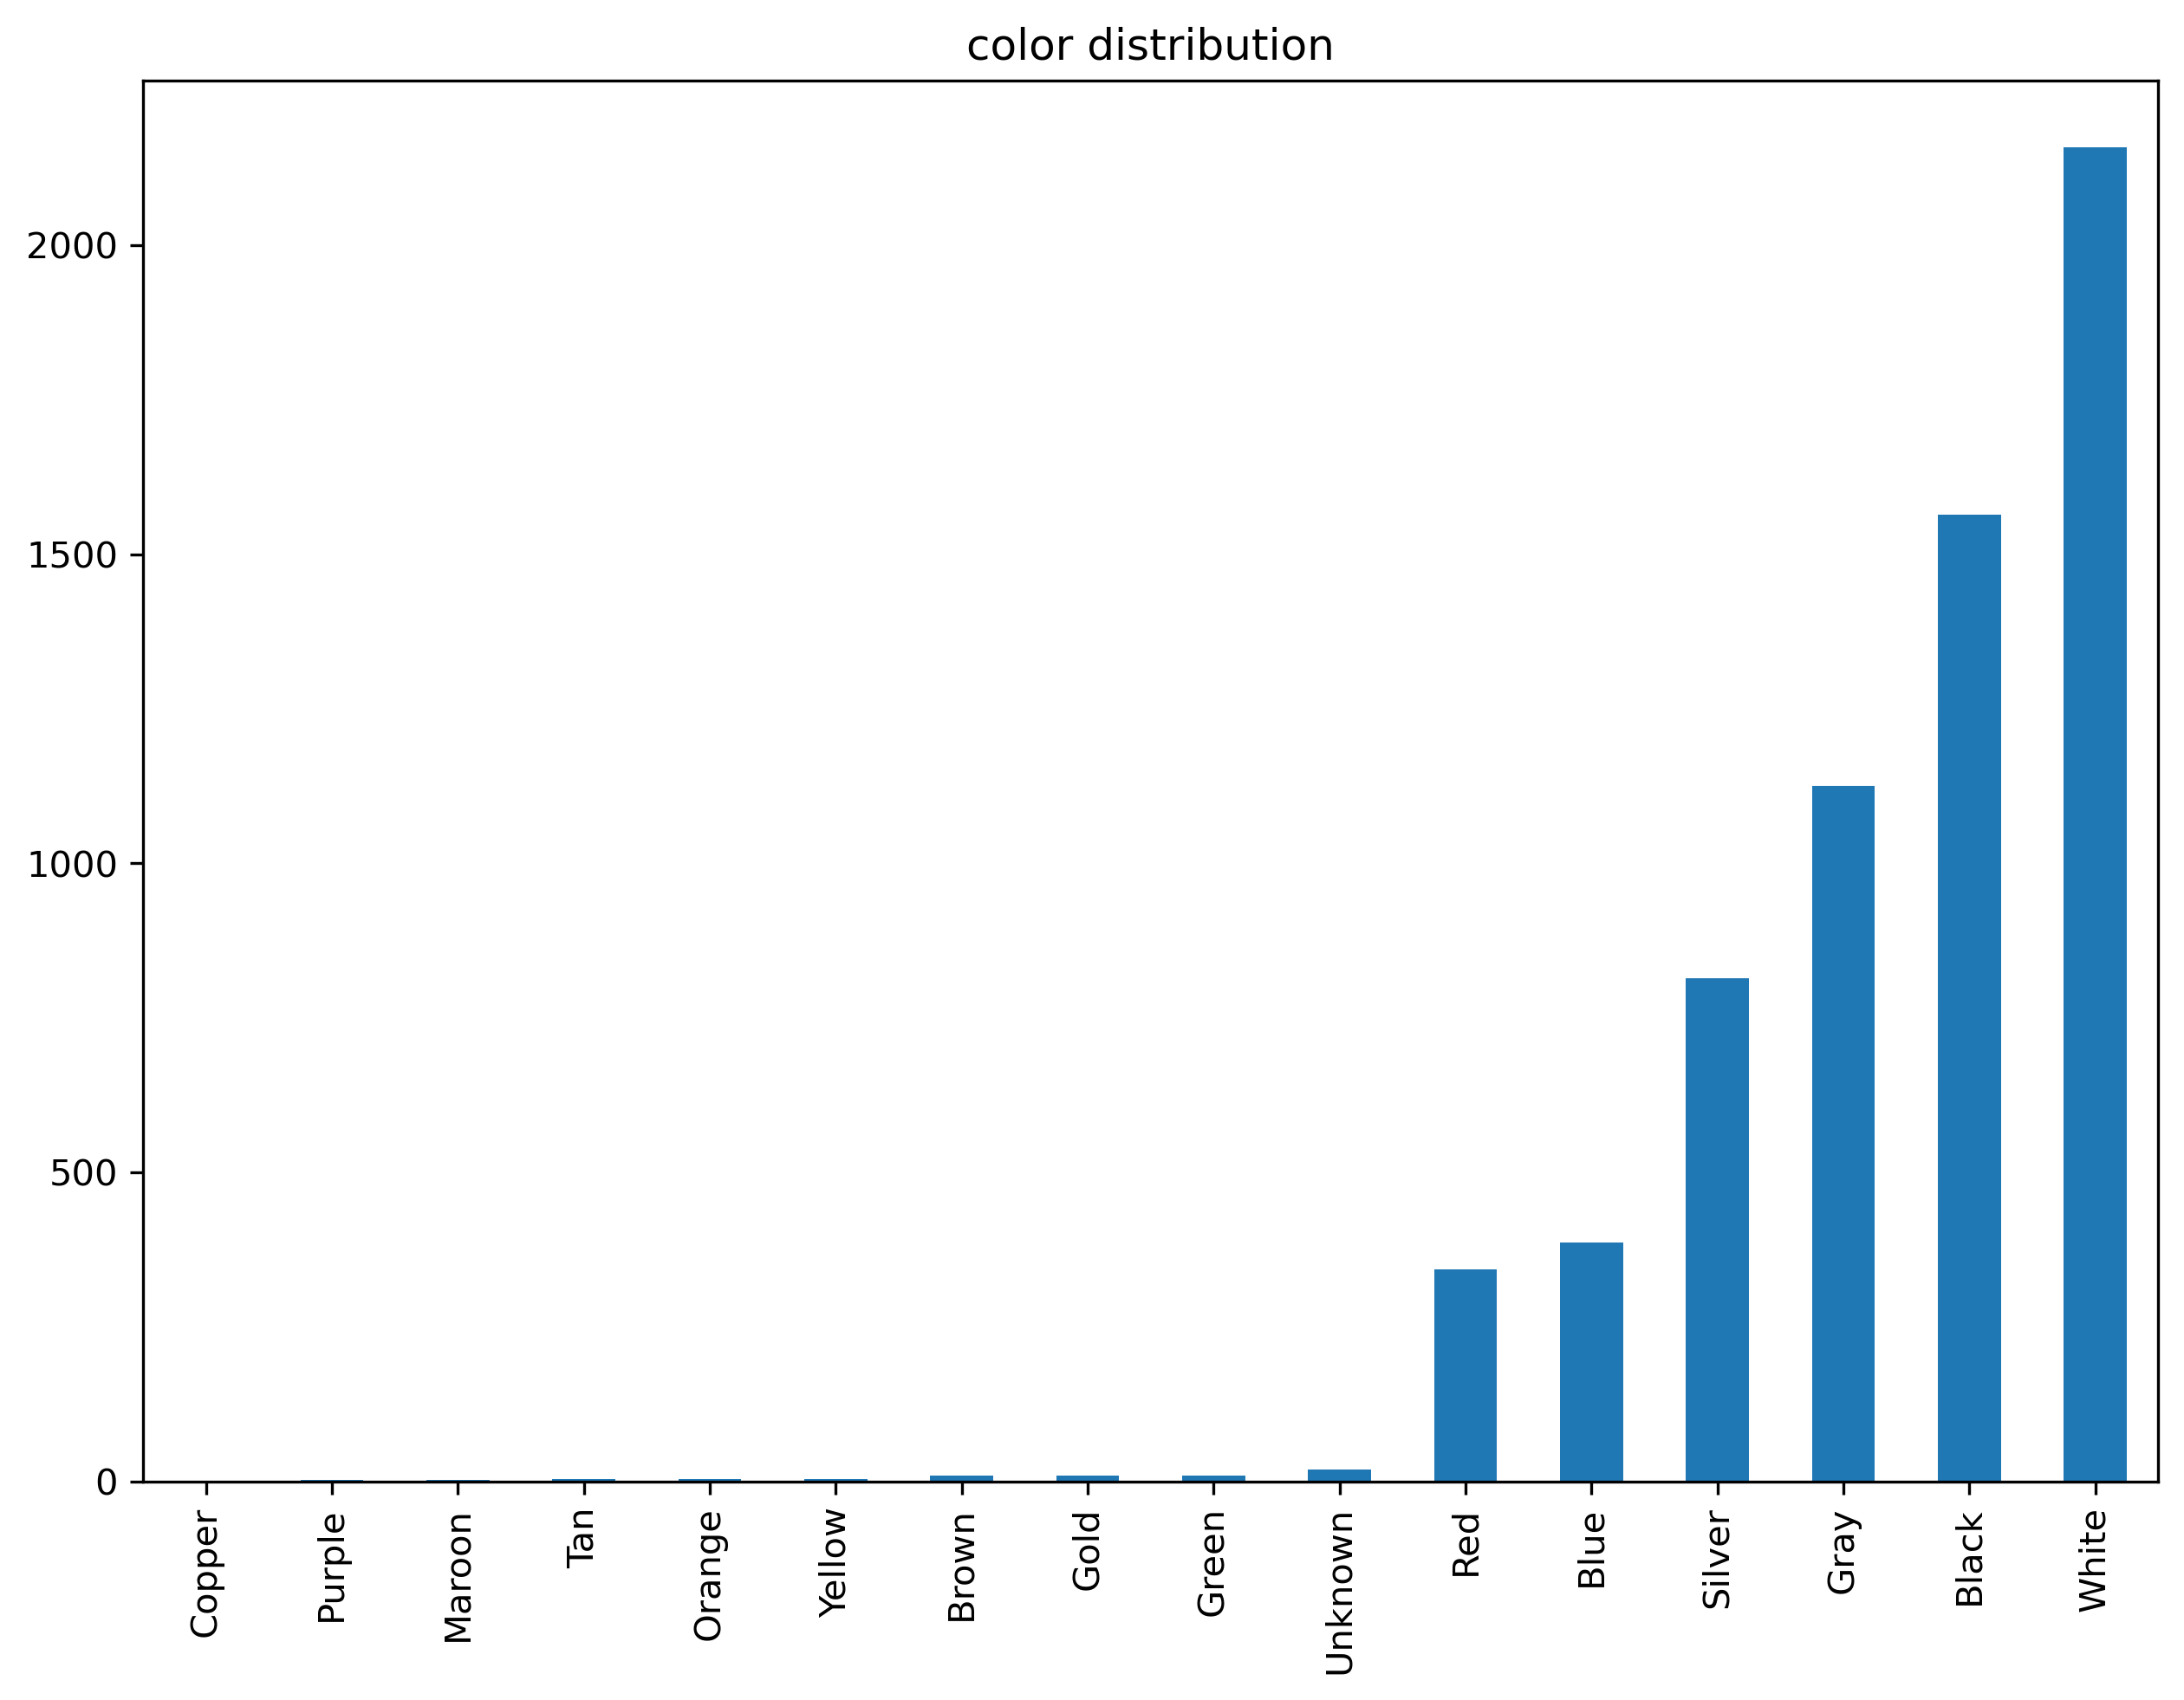

In [44]:
plt.figure(figsize=(10,7))
df2['color'].value_counts().sort_values().plot(kind='bar')
plt.title('color distribution')

In [45]:
df2.color.unique()

array(['Silver', 'Blue', 'White', 'Black', 'Gray', 'Red', 'Tan',
       'Unknown', 'Brown', 'Copper', 'Orange', 'Gold', 'Green', 'Yellow',
       'Purple', 'Maroon'], dtype=object)

In [46]:
df2.color[df2.color=='Unknown'] = np.nan #Unknown is not help to the research

In [47]:
df2.isnull().sum() ##need to be treat

year          0
make          0
model         0
km            0
accident      0
owner       100
use           0
color        19
price         0
dtype: int64

# Delete rows with null

In [48]:
df2=df2.dropna(axis=0)

In [49]:
df2.isnull().sum()

year        0
make        0
model       0
km          0
accident    0
owner       0
use         0
color       0
price       0
dtype: int64

<Figure size 1200x1200 with 0 Axes>

<AxesSubplot:ylabel='accident'>

Text(0.5, 1.0, 'accident distibution')

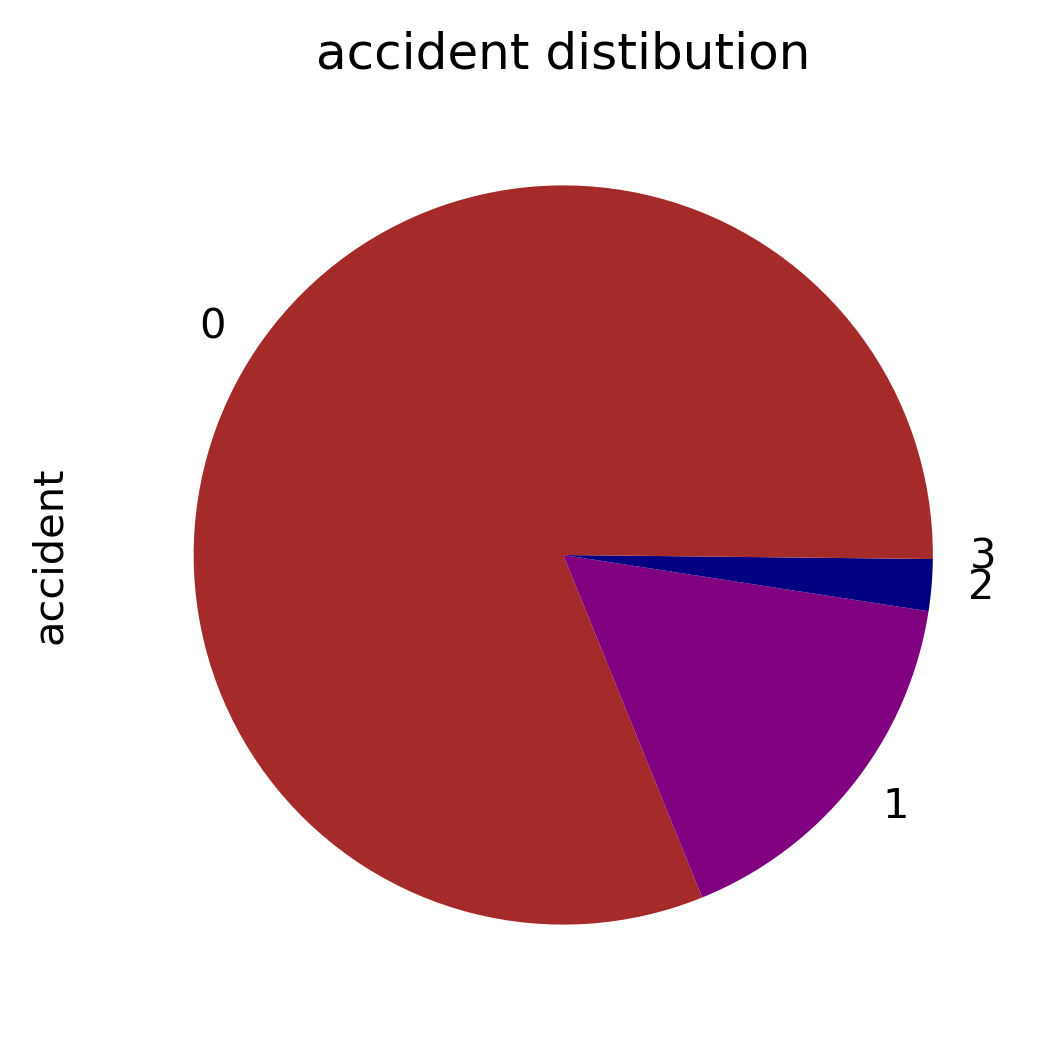

In [50]:
plt.figure(figsize=(4,4))
df2["accident"].value_counts().plot(kind='pie', colors = ['brown', 'purple', 'navy'])
plt.title('accident distibution')

# ניתן לראות כי הקשר החזק ביותר למחיר מבין הערכים הוא של שנת היצור של הרכב

# Graphs of conection between price column to numerics columns:

<Figure size 3000x2100 with 0 Axes>

<AxesSubplot:>

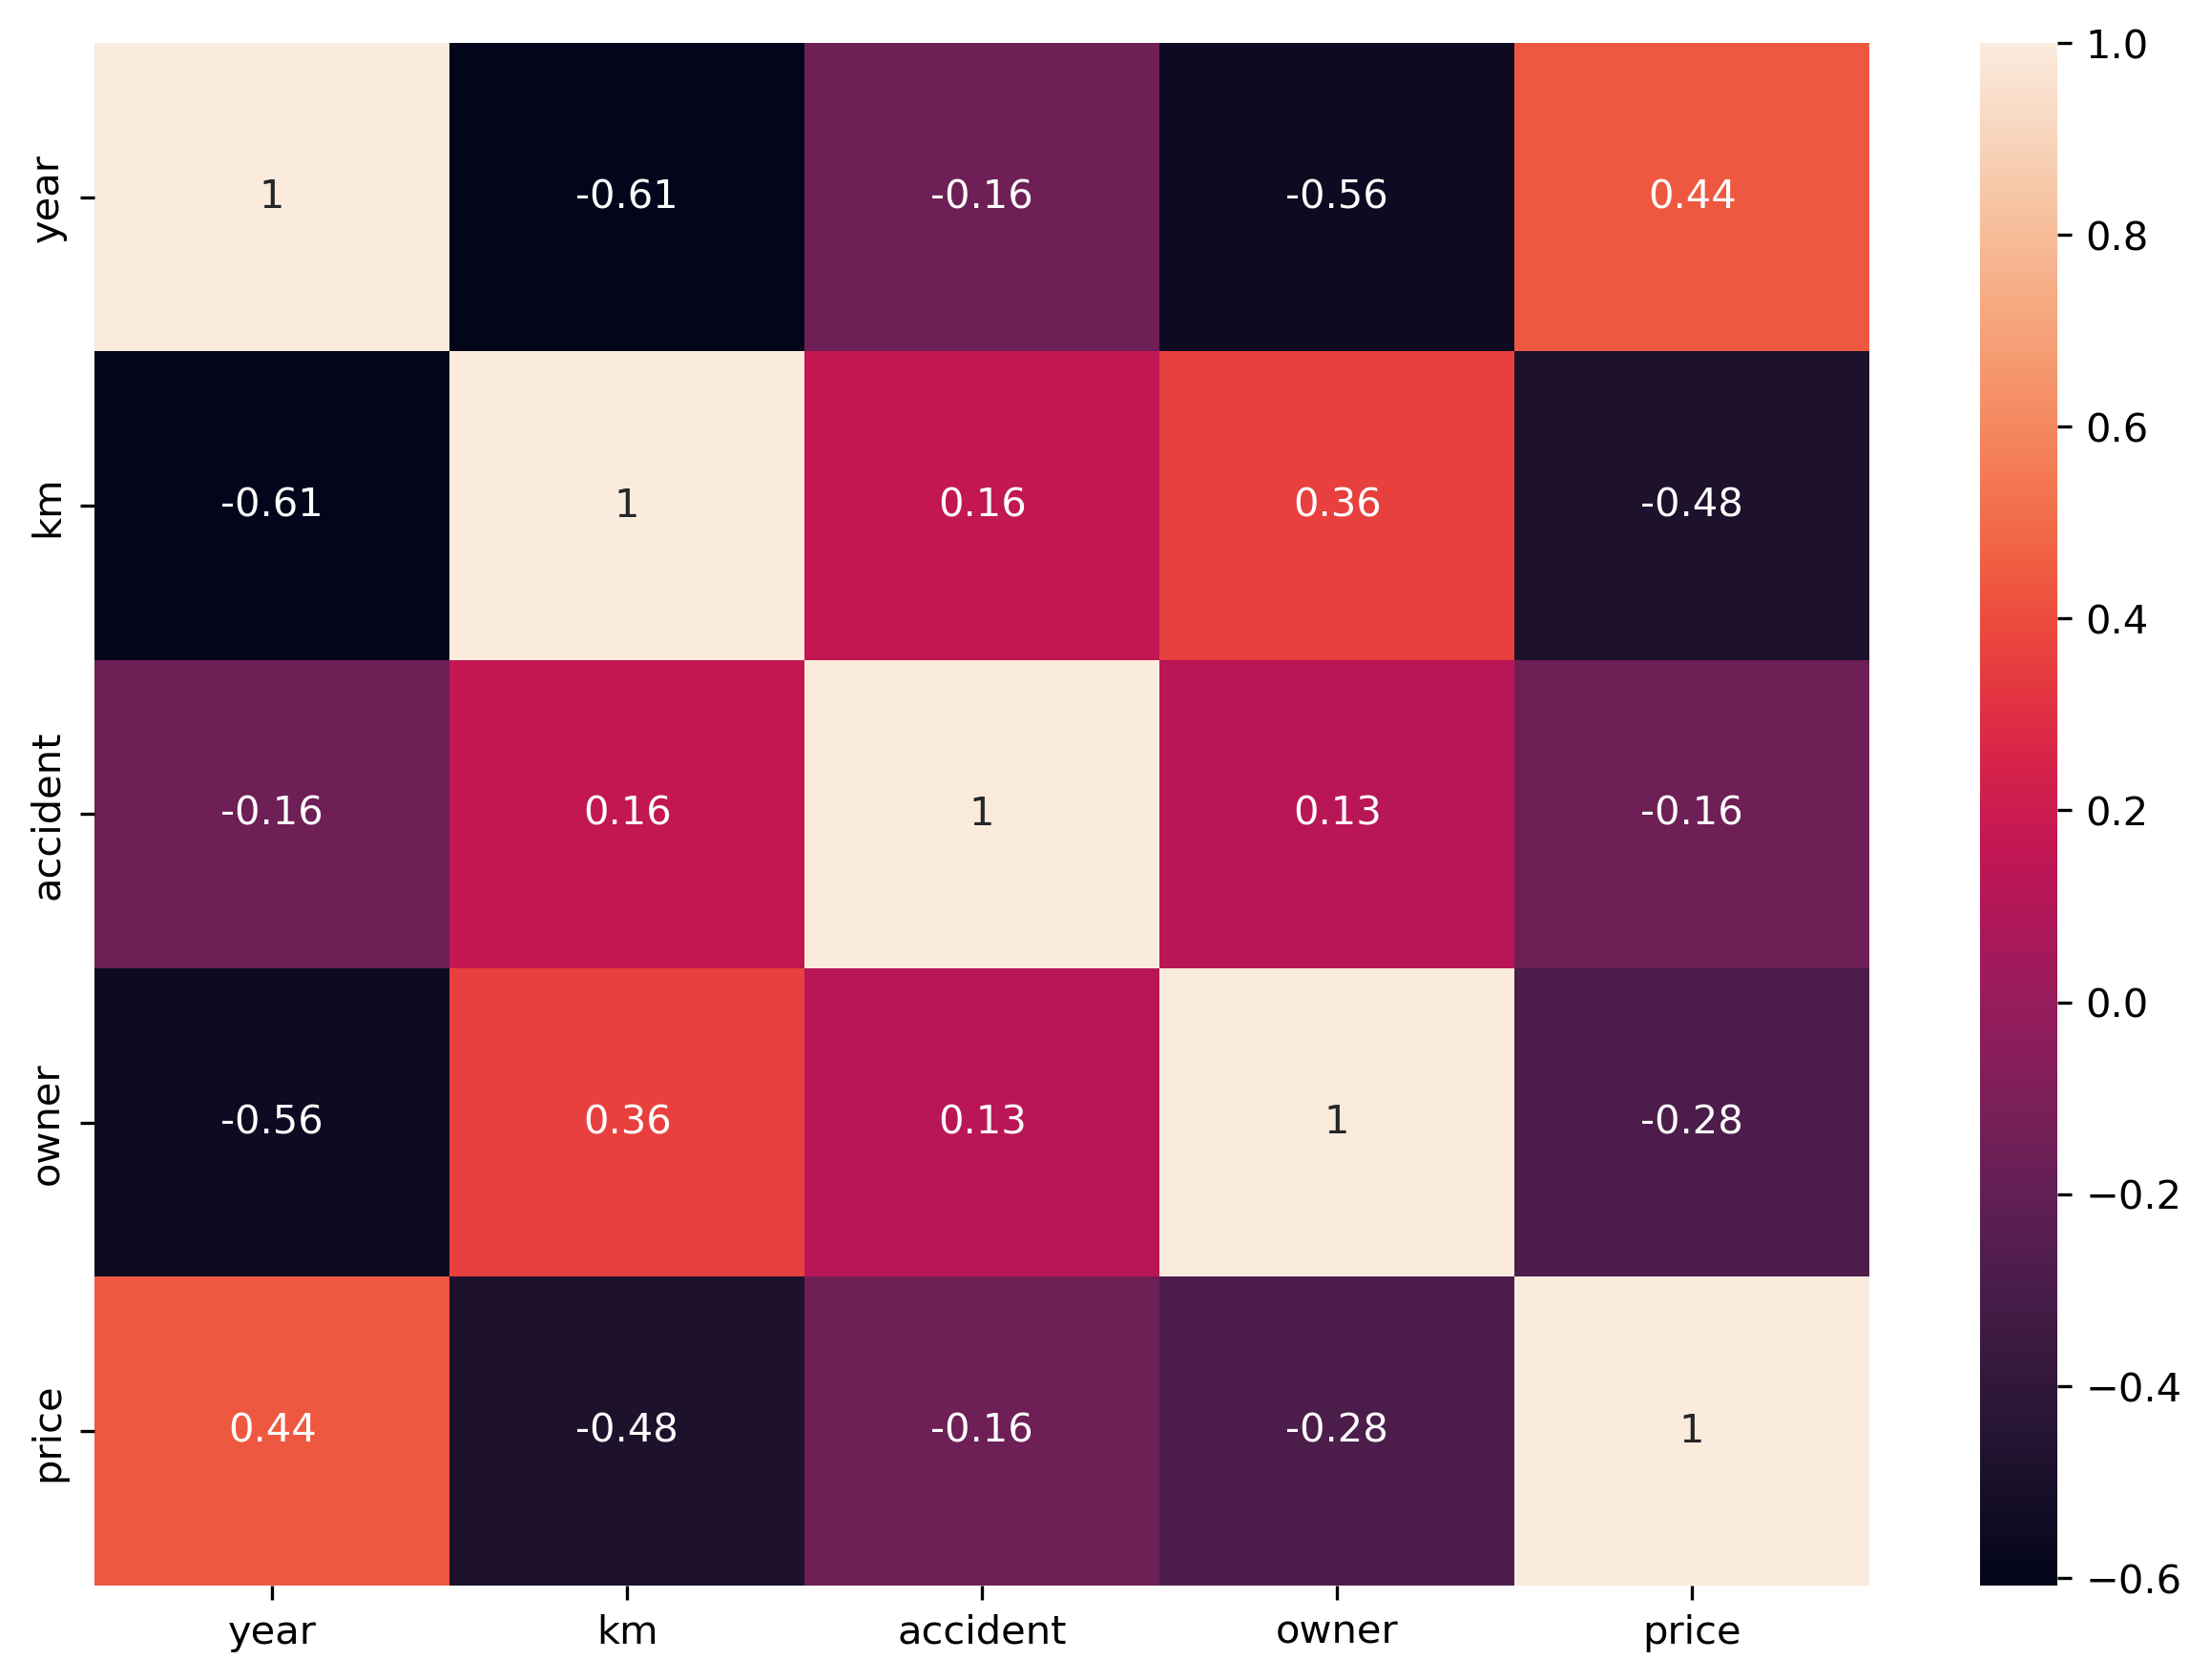

In [51]:

plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), annot=True)
##ככל שהגוון בהיר יותר הקשר חזק יתר= מתקרב ל1

Text(0.5, 0, 'year')

Text(0, 0.5, 'price')

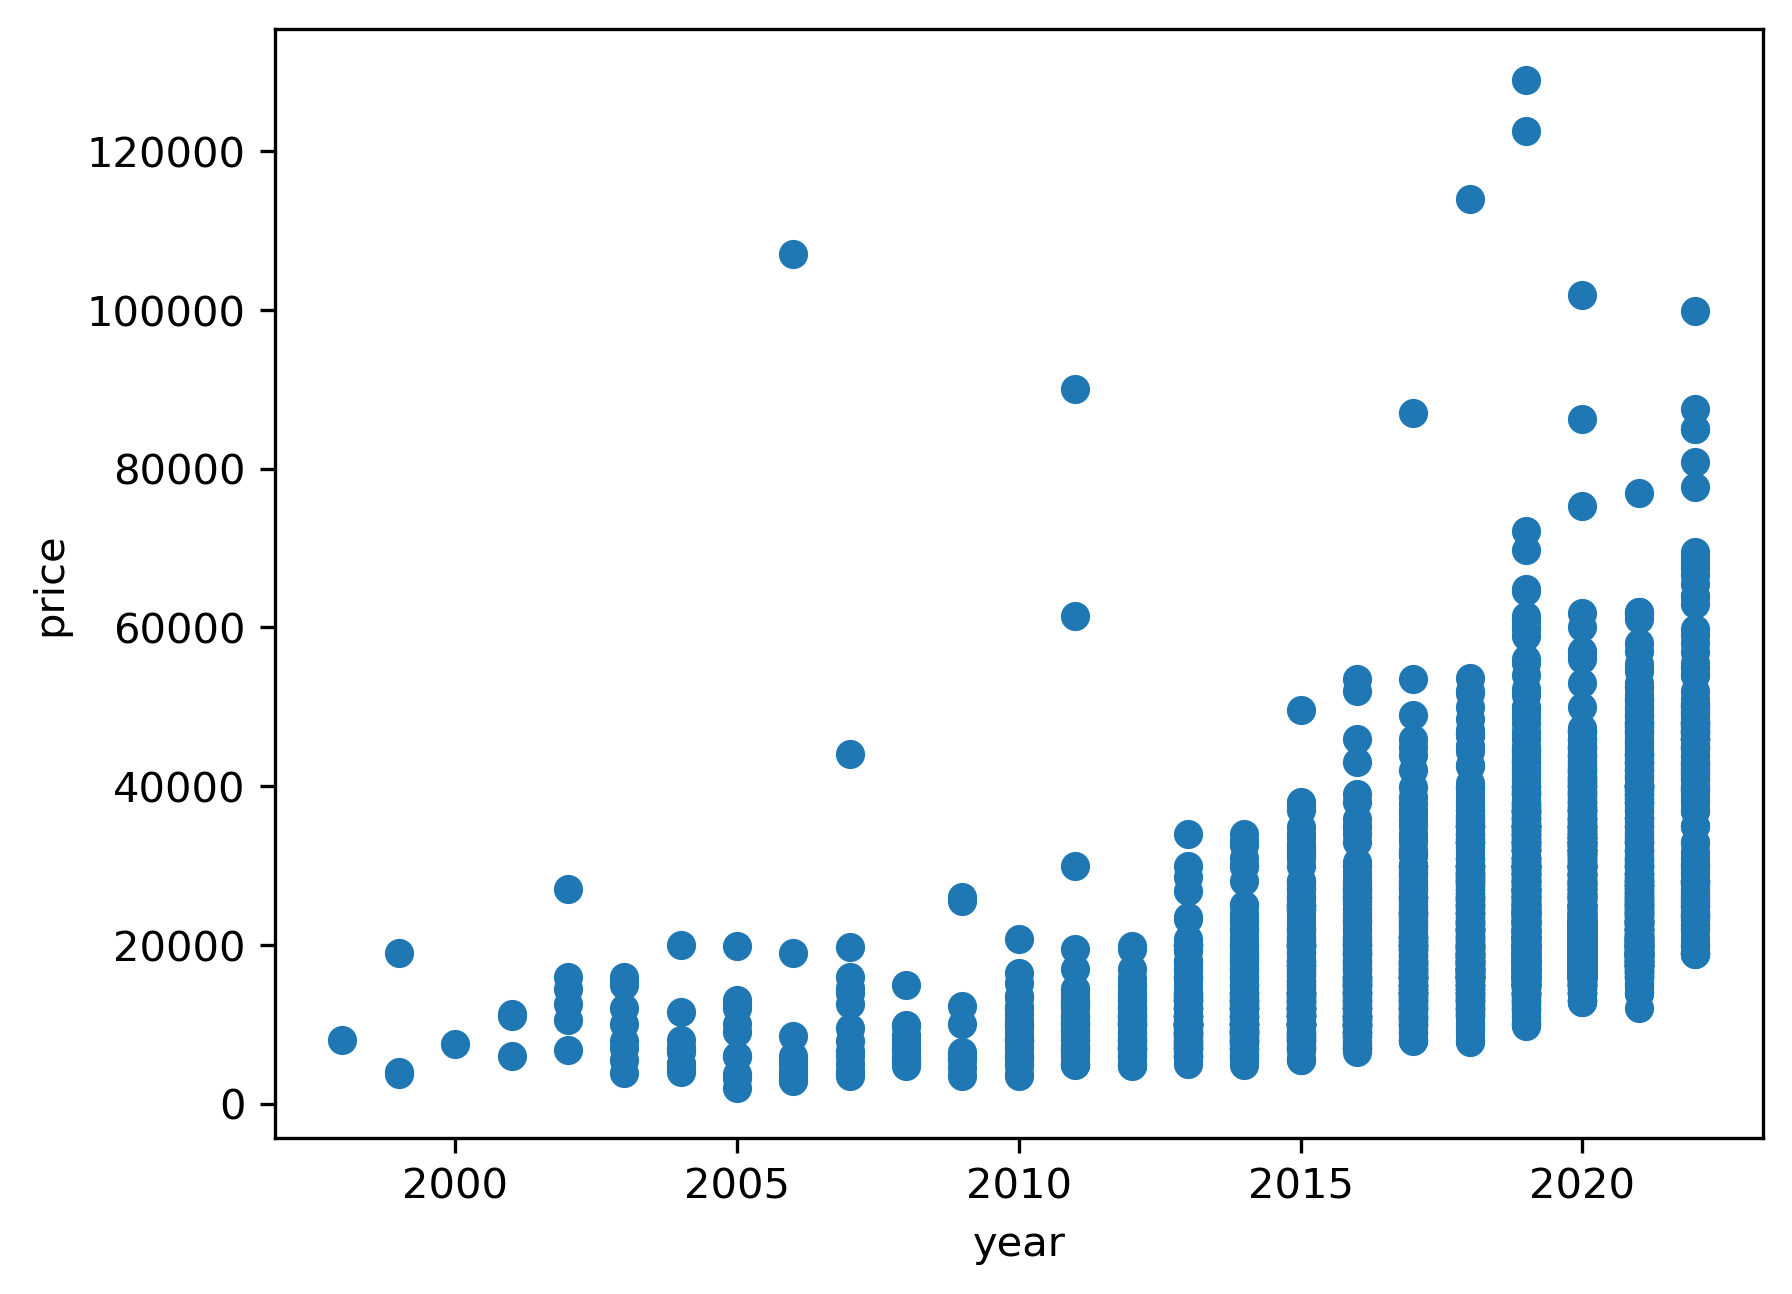

In [52]:
#Scatter plots 
fig = plt.figure()
ax = plt.axes()
ax.scatter(df2.year, df2.price)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

Text(0.5, 0, 'km')

Text(0, 0.5, 'price')

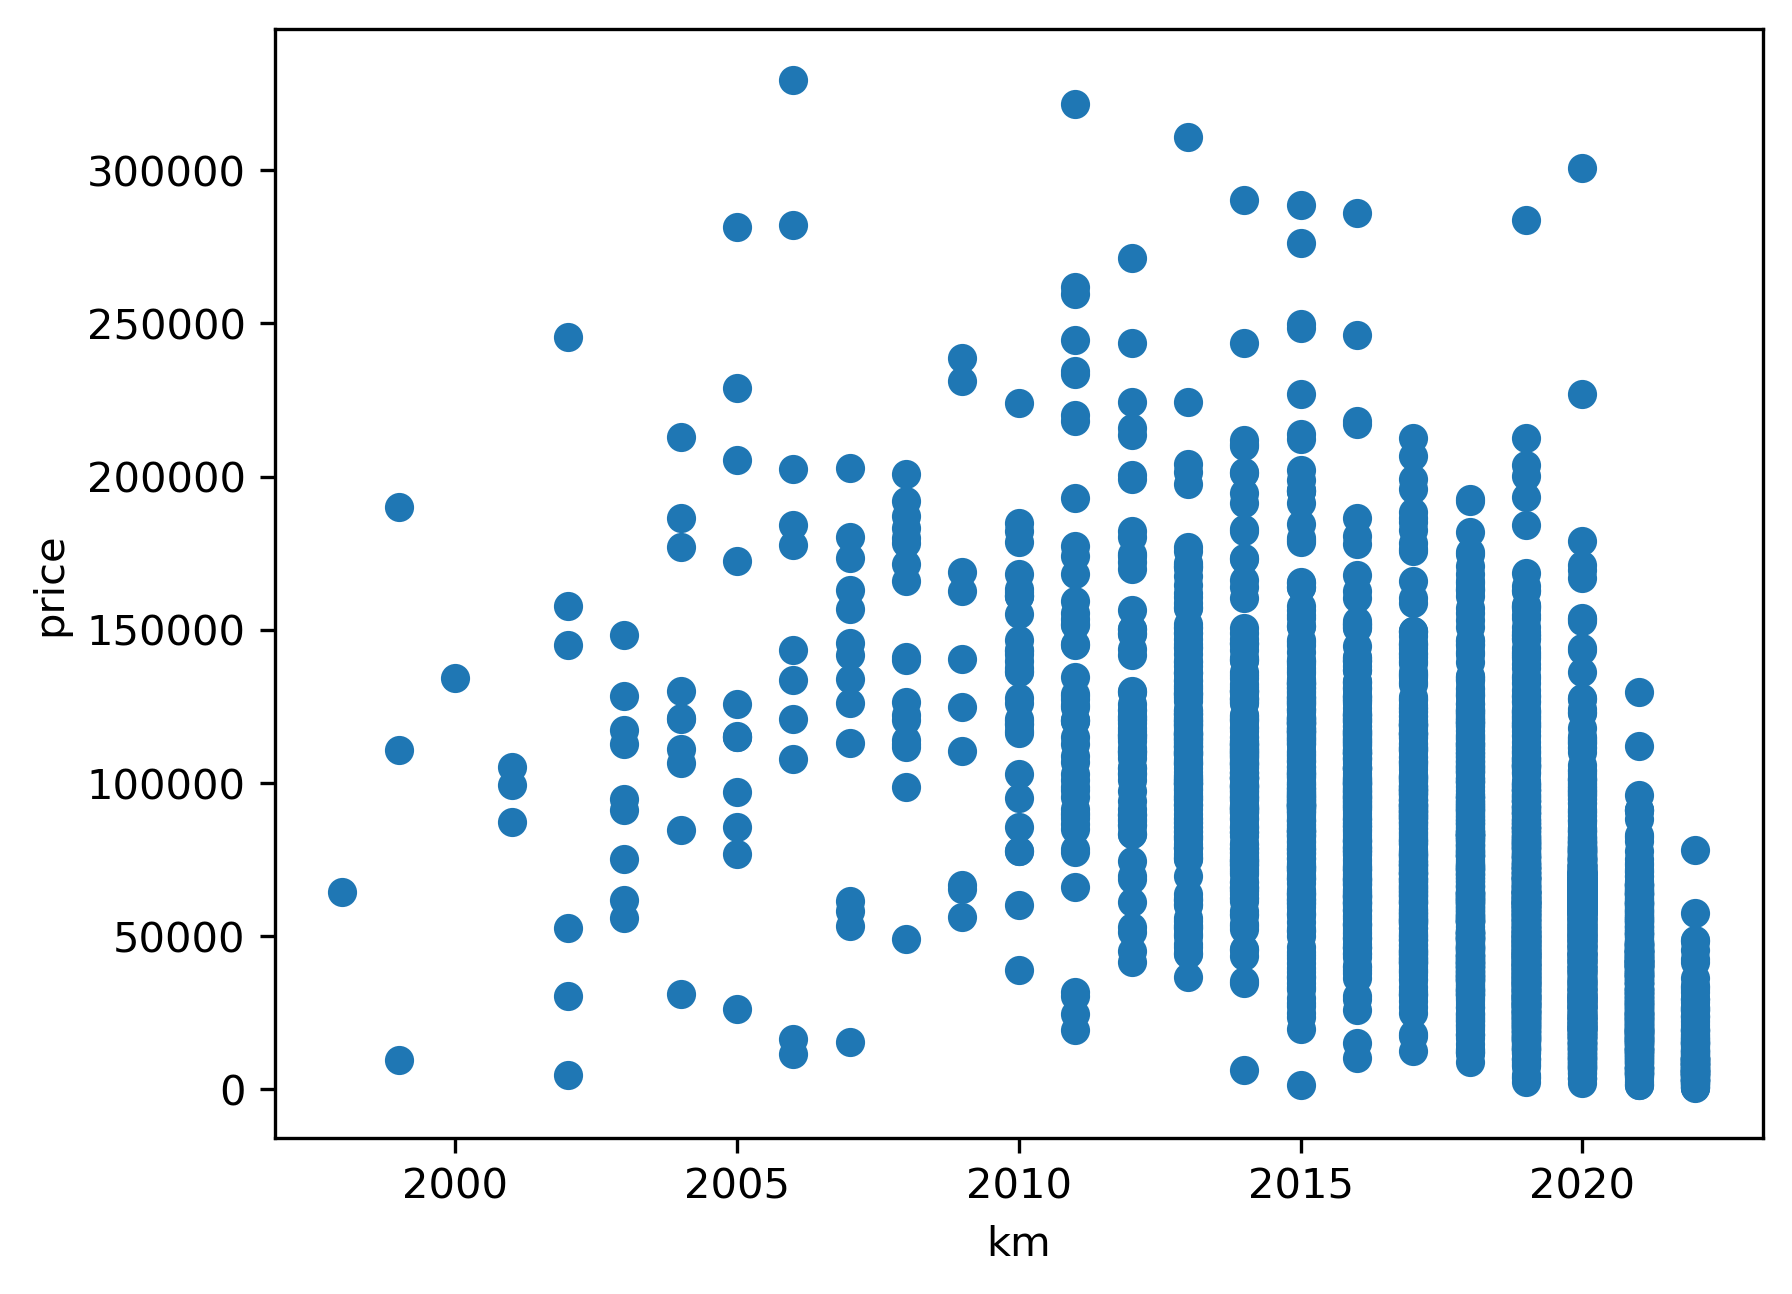

In [53]:
#Scatter plots 
fig = plt.figure()
ax = plt.axes()
ax.scatter(df2.year, df2.km)
plt.xlabel('km')
plt.ylabel('price')
plt.show()

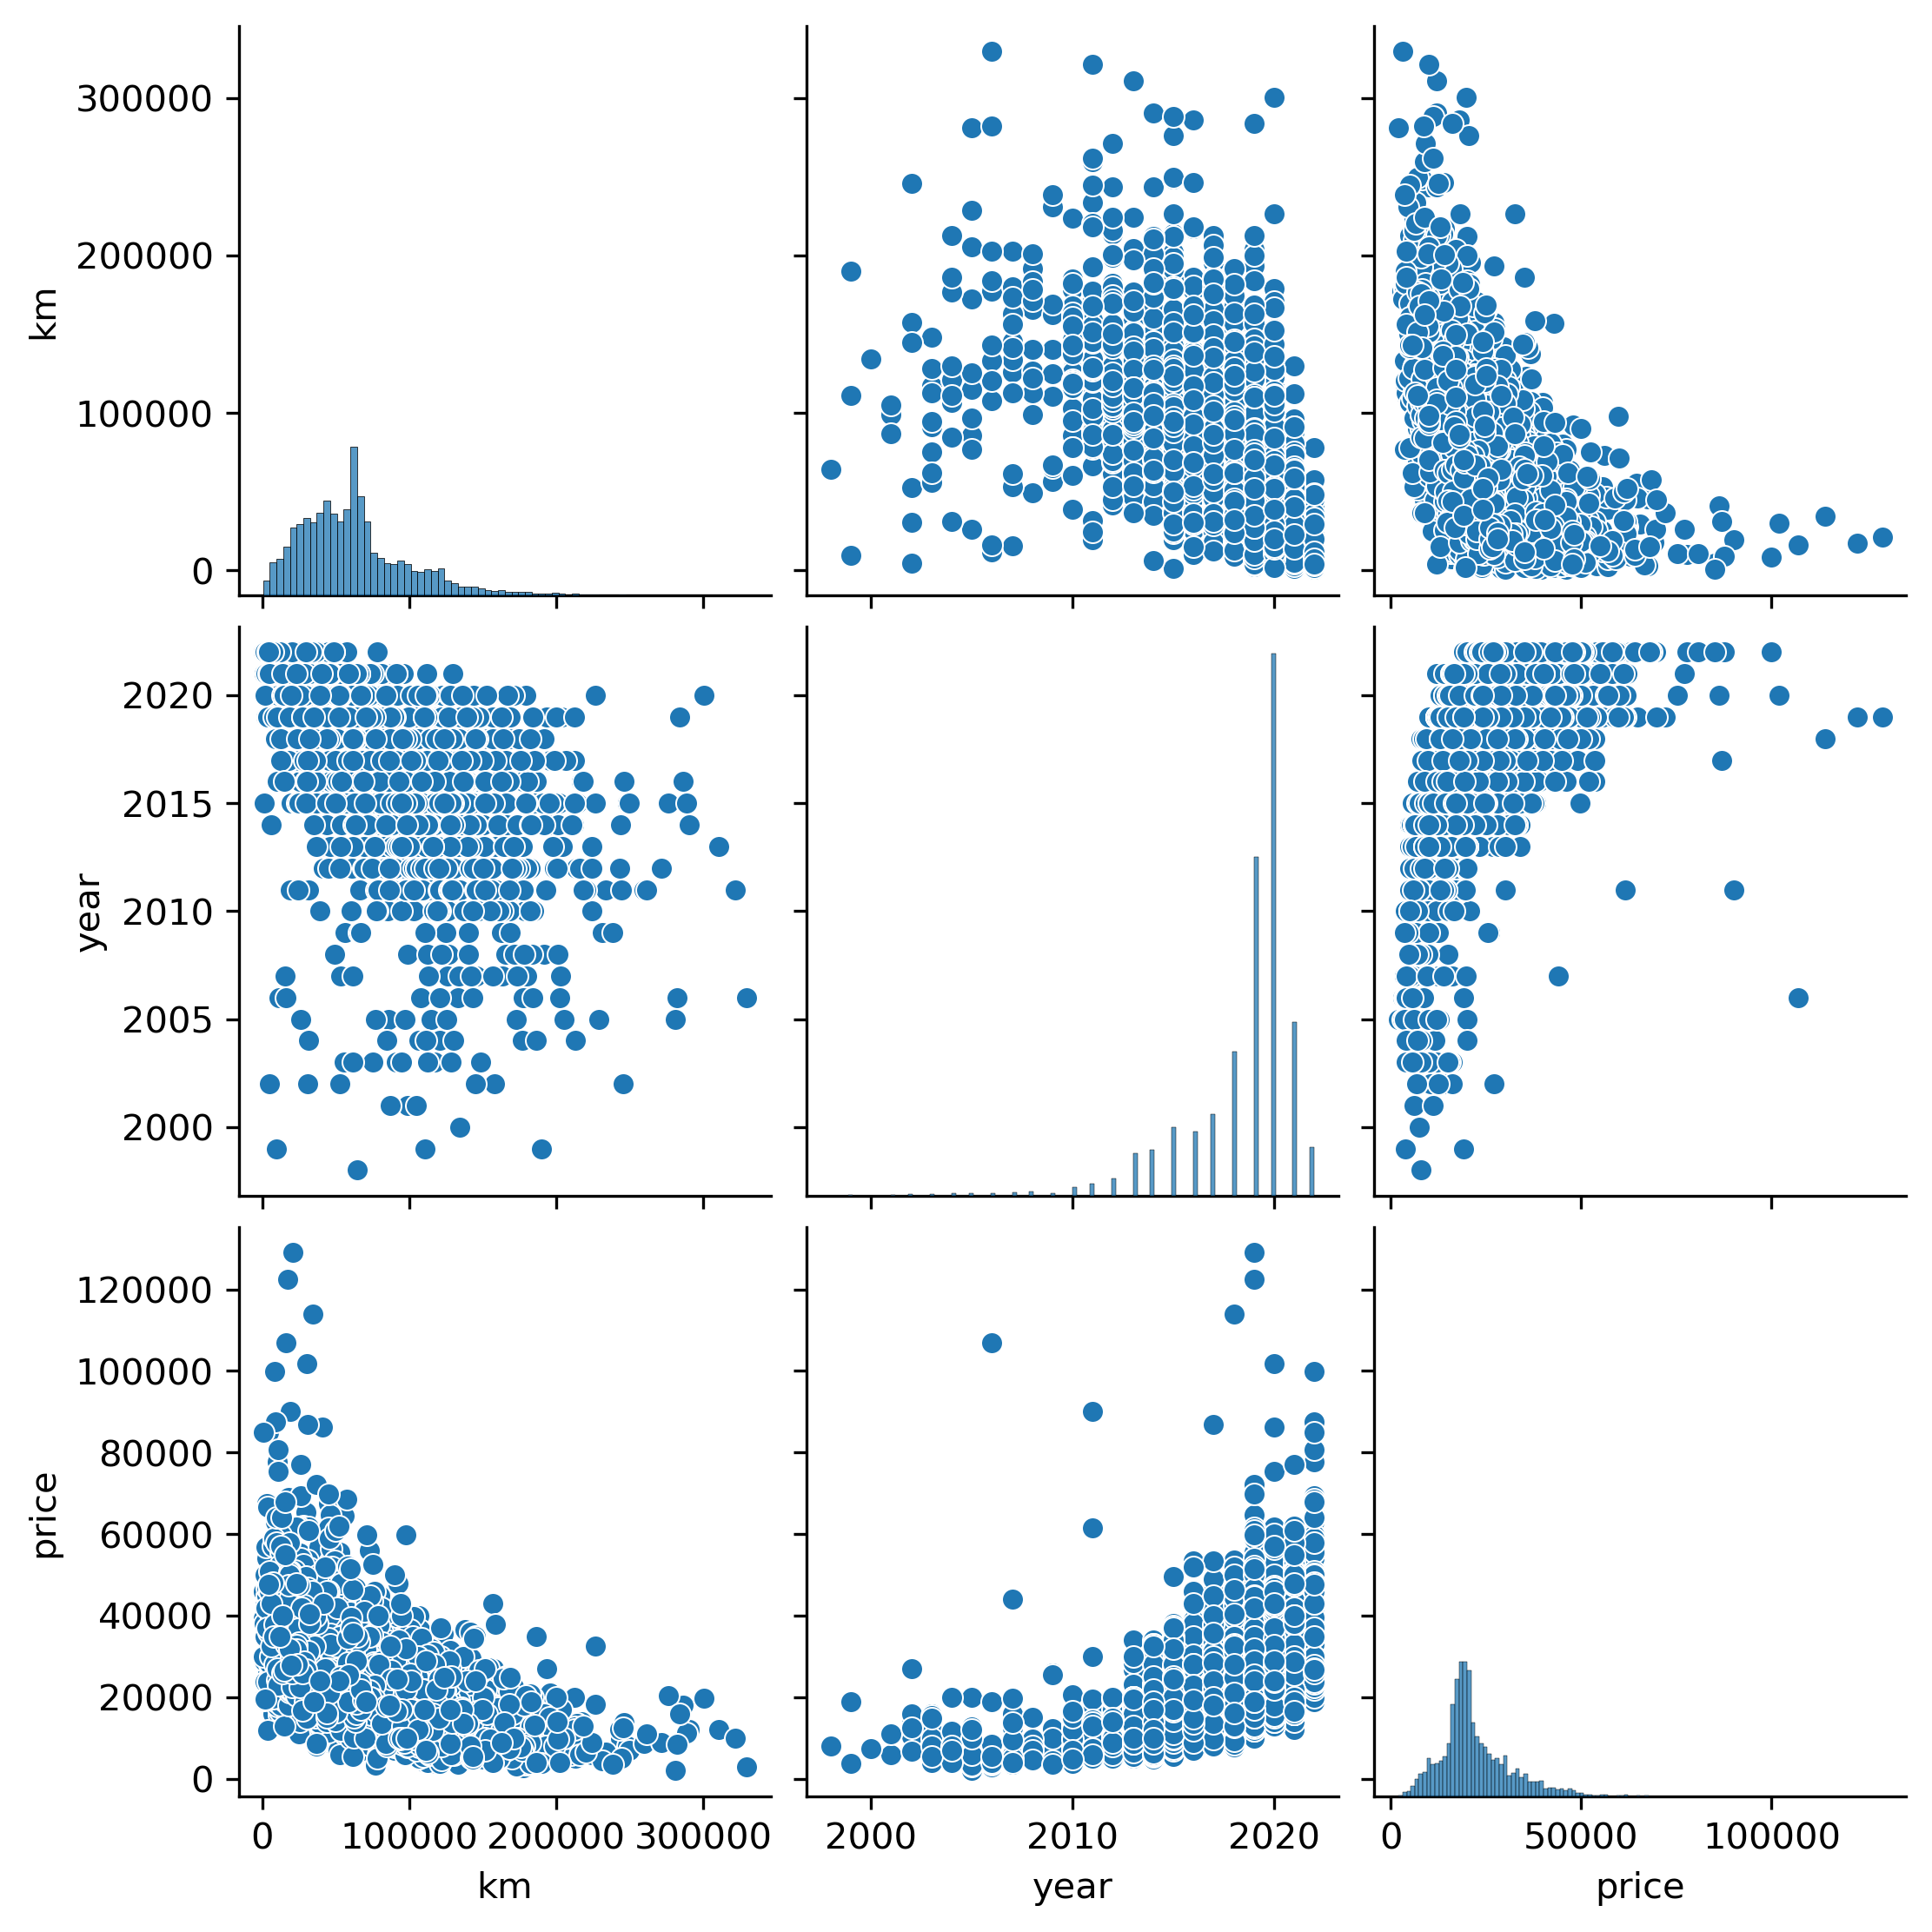

In [54]:
sns.pairplot(df2[['km', 'year', 'price']])

# Graphs of conection between price column to categorial columns:

<Figure size 3000x2100 with 0 Axes>

<AxesSubplot:xlabel='color', ylabel='price'>

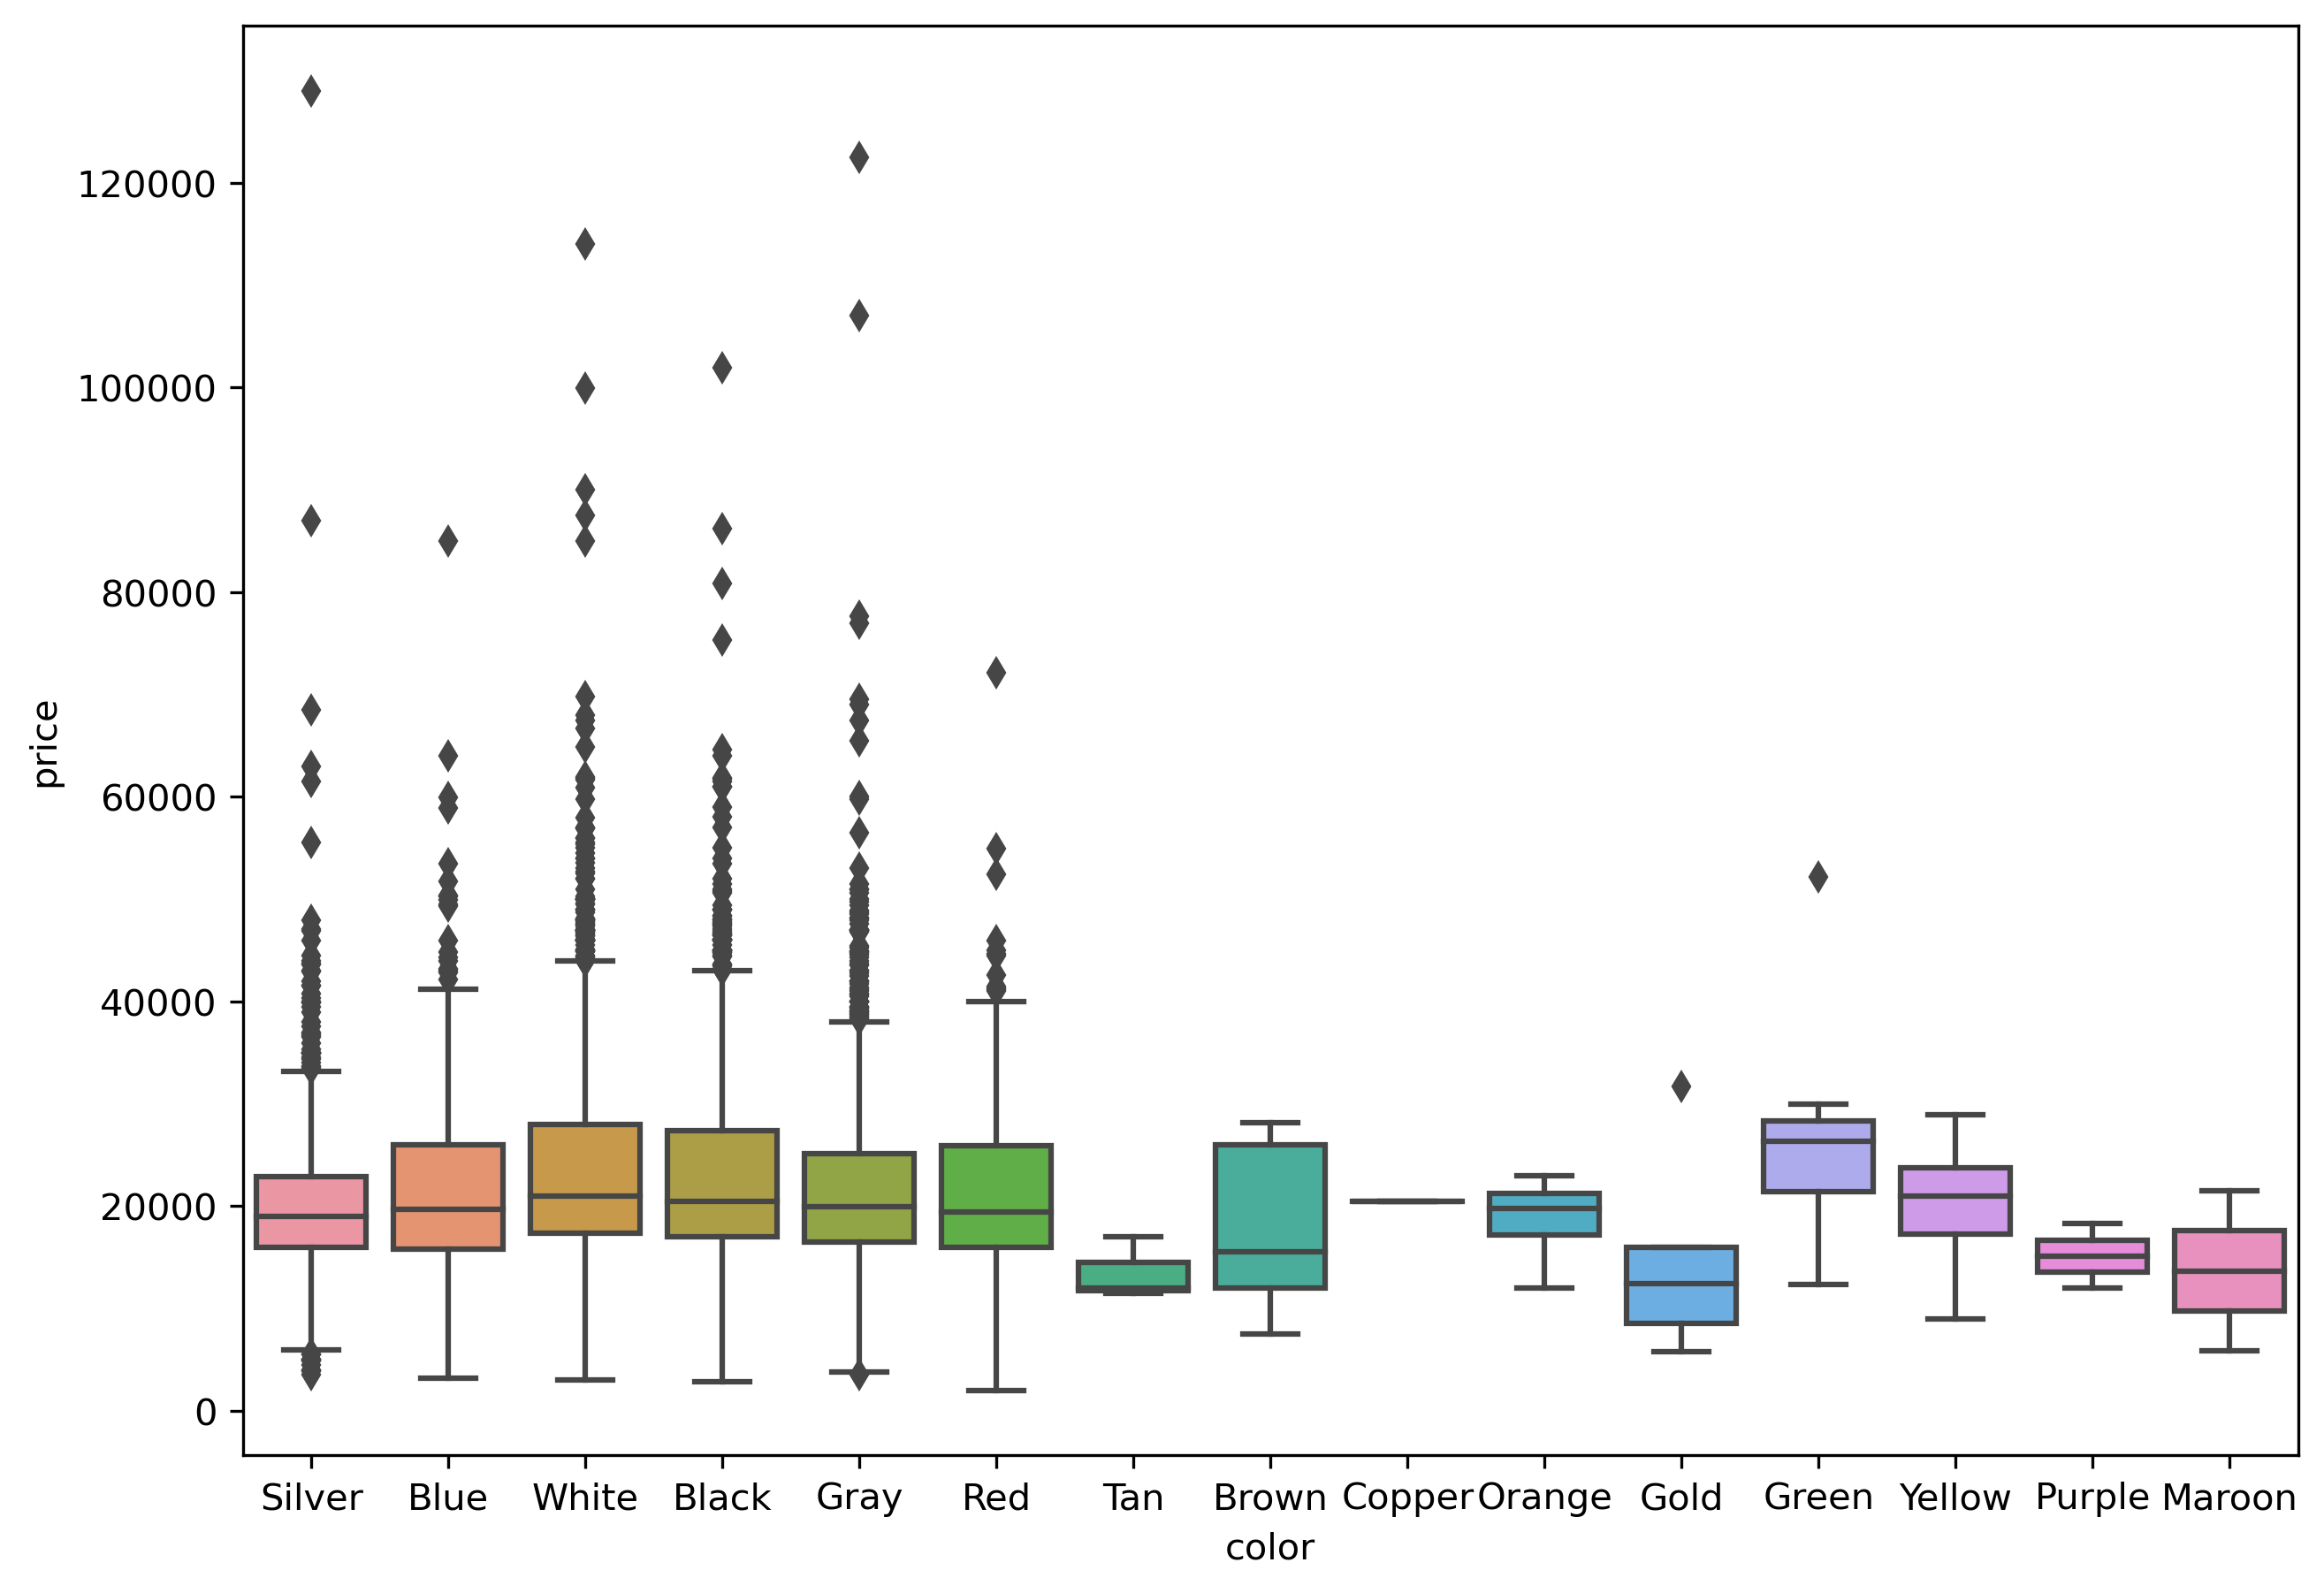

In [55]:
plt.figure(figsize=(10,7))
sns.boxplot(df2.color, df2.price)

<Figure size 3000x2100 with 0 Axes>

<AxesSubplot:xlabel='owner', ylabel='price'>

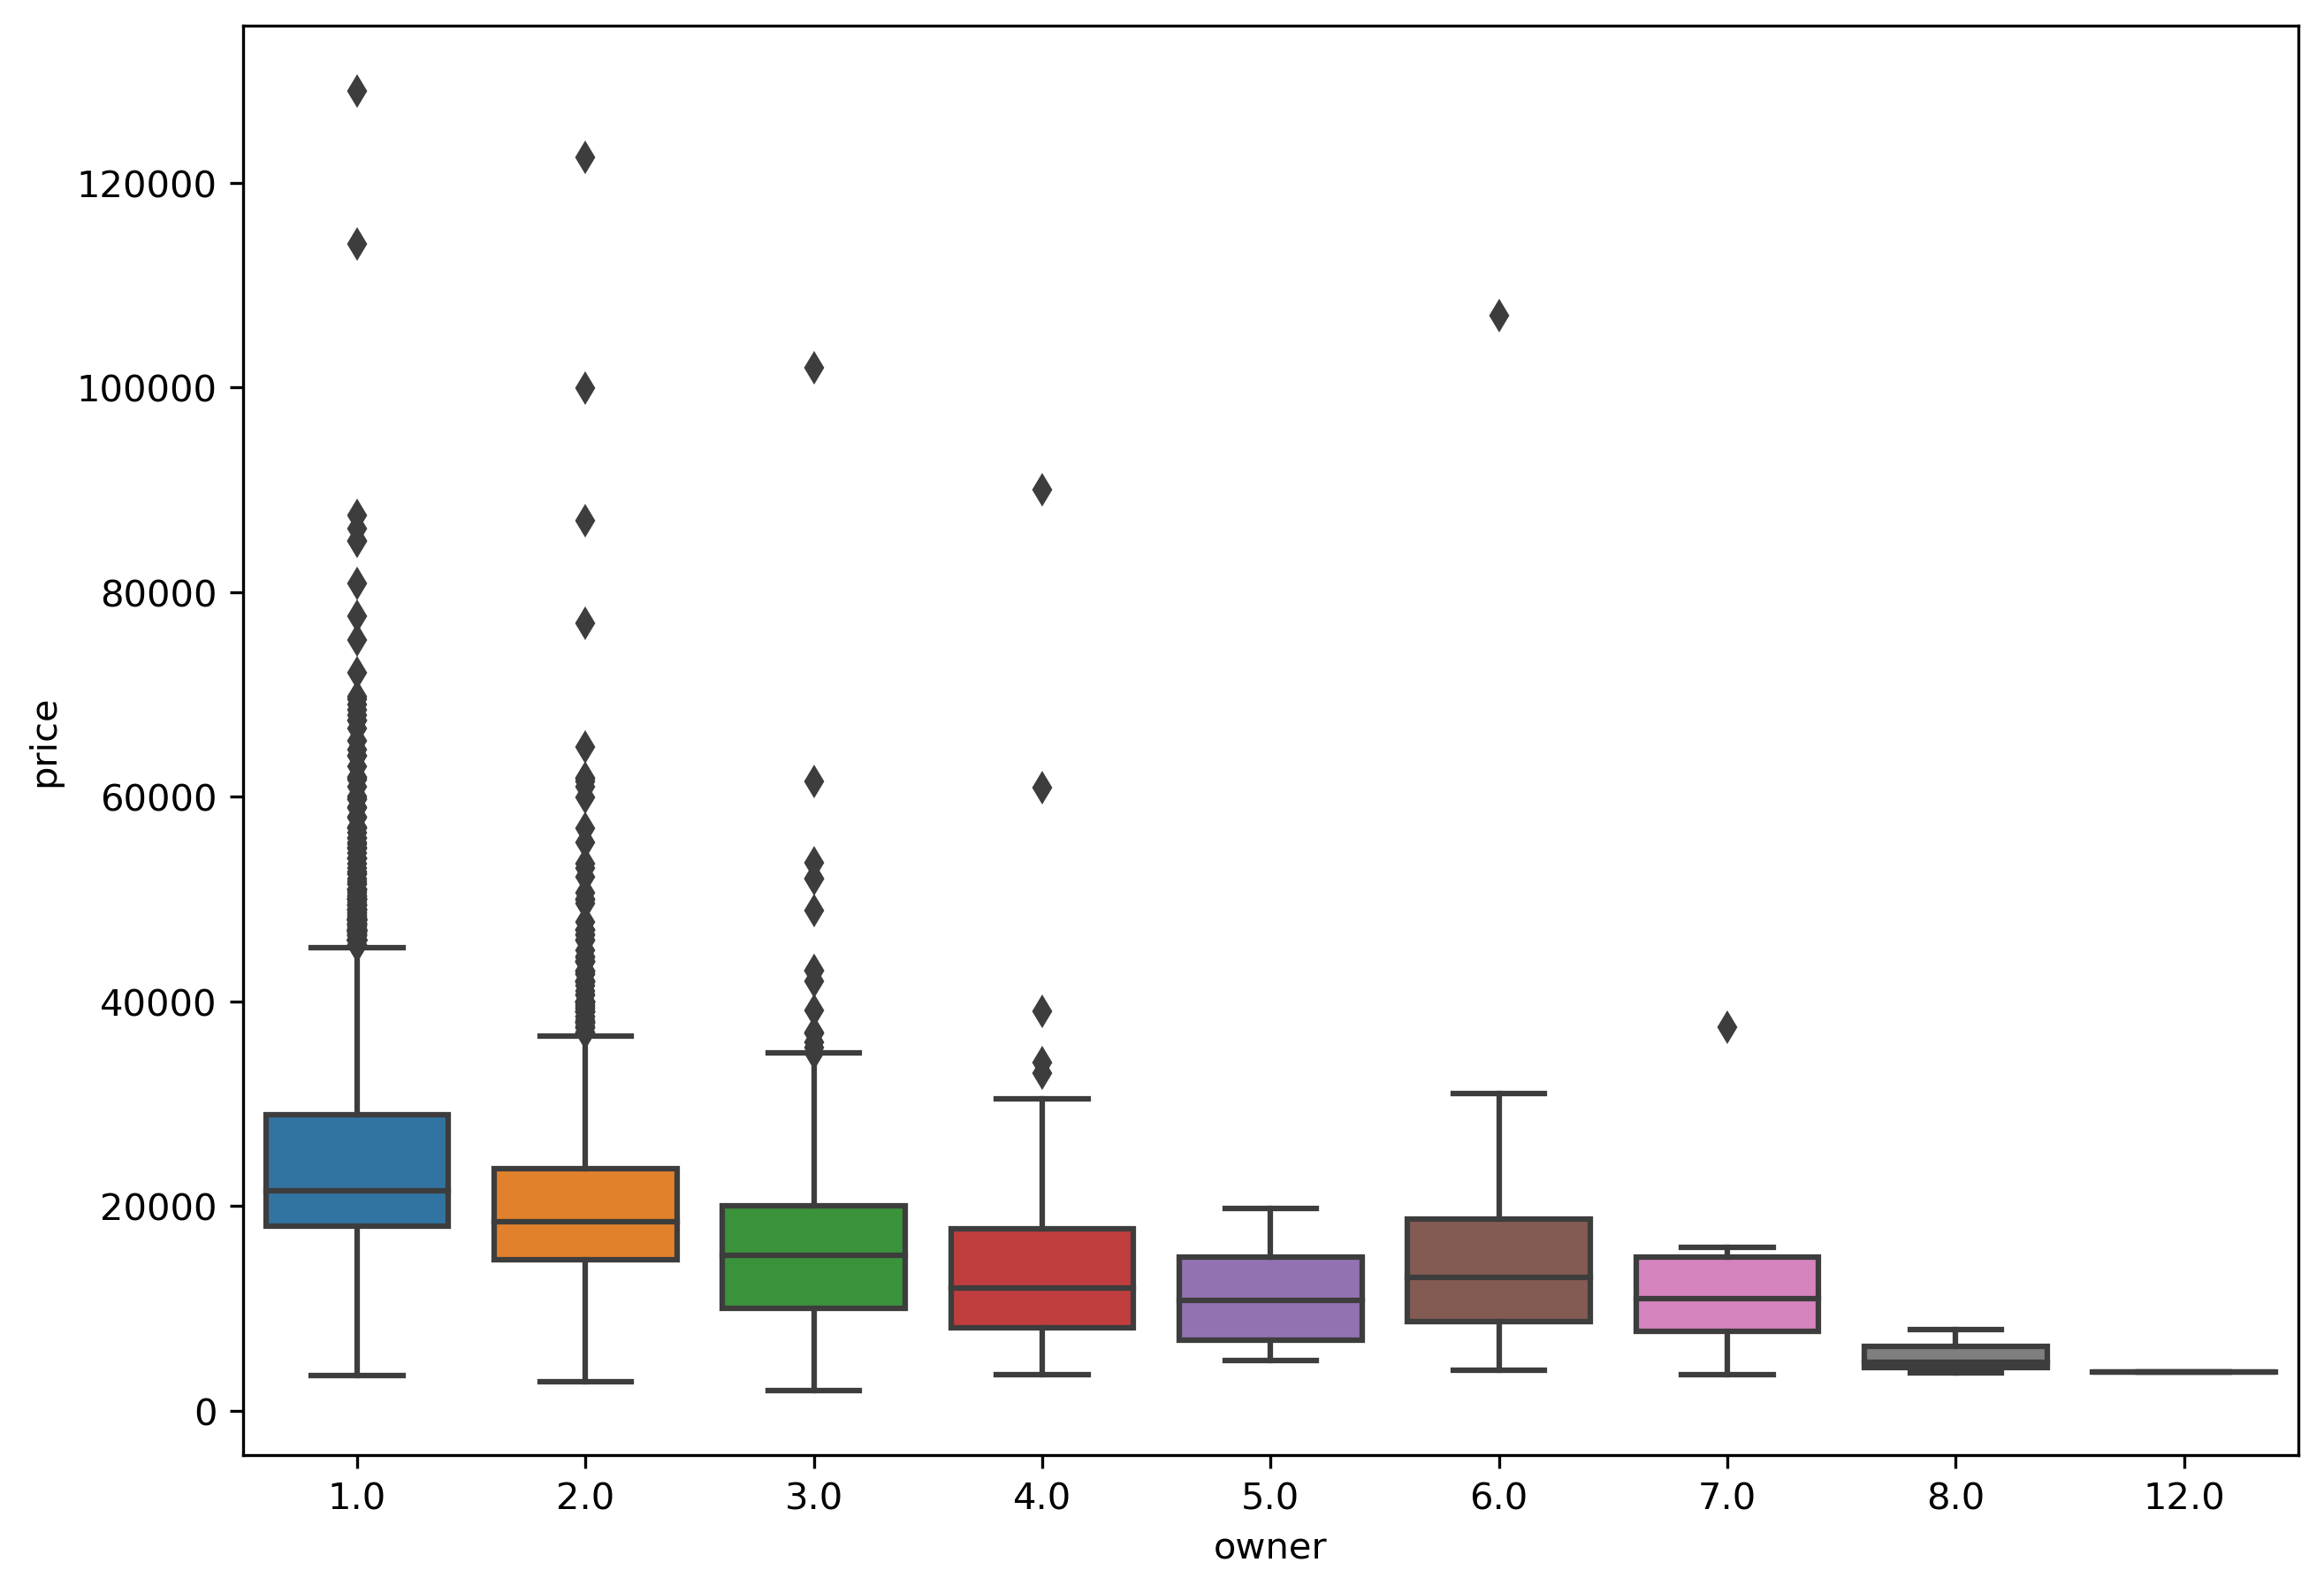

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(df2.owner, df2.price)

<Figure size 3000x2100 with 0 Axes>

<AxesSubplot:xlabel='use', ylabel='price'>

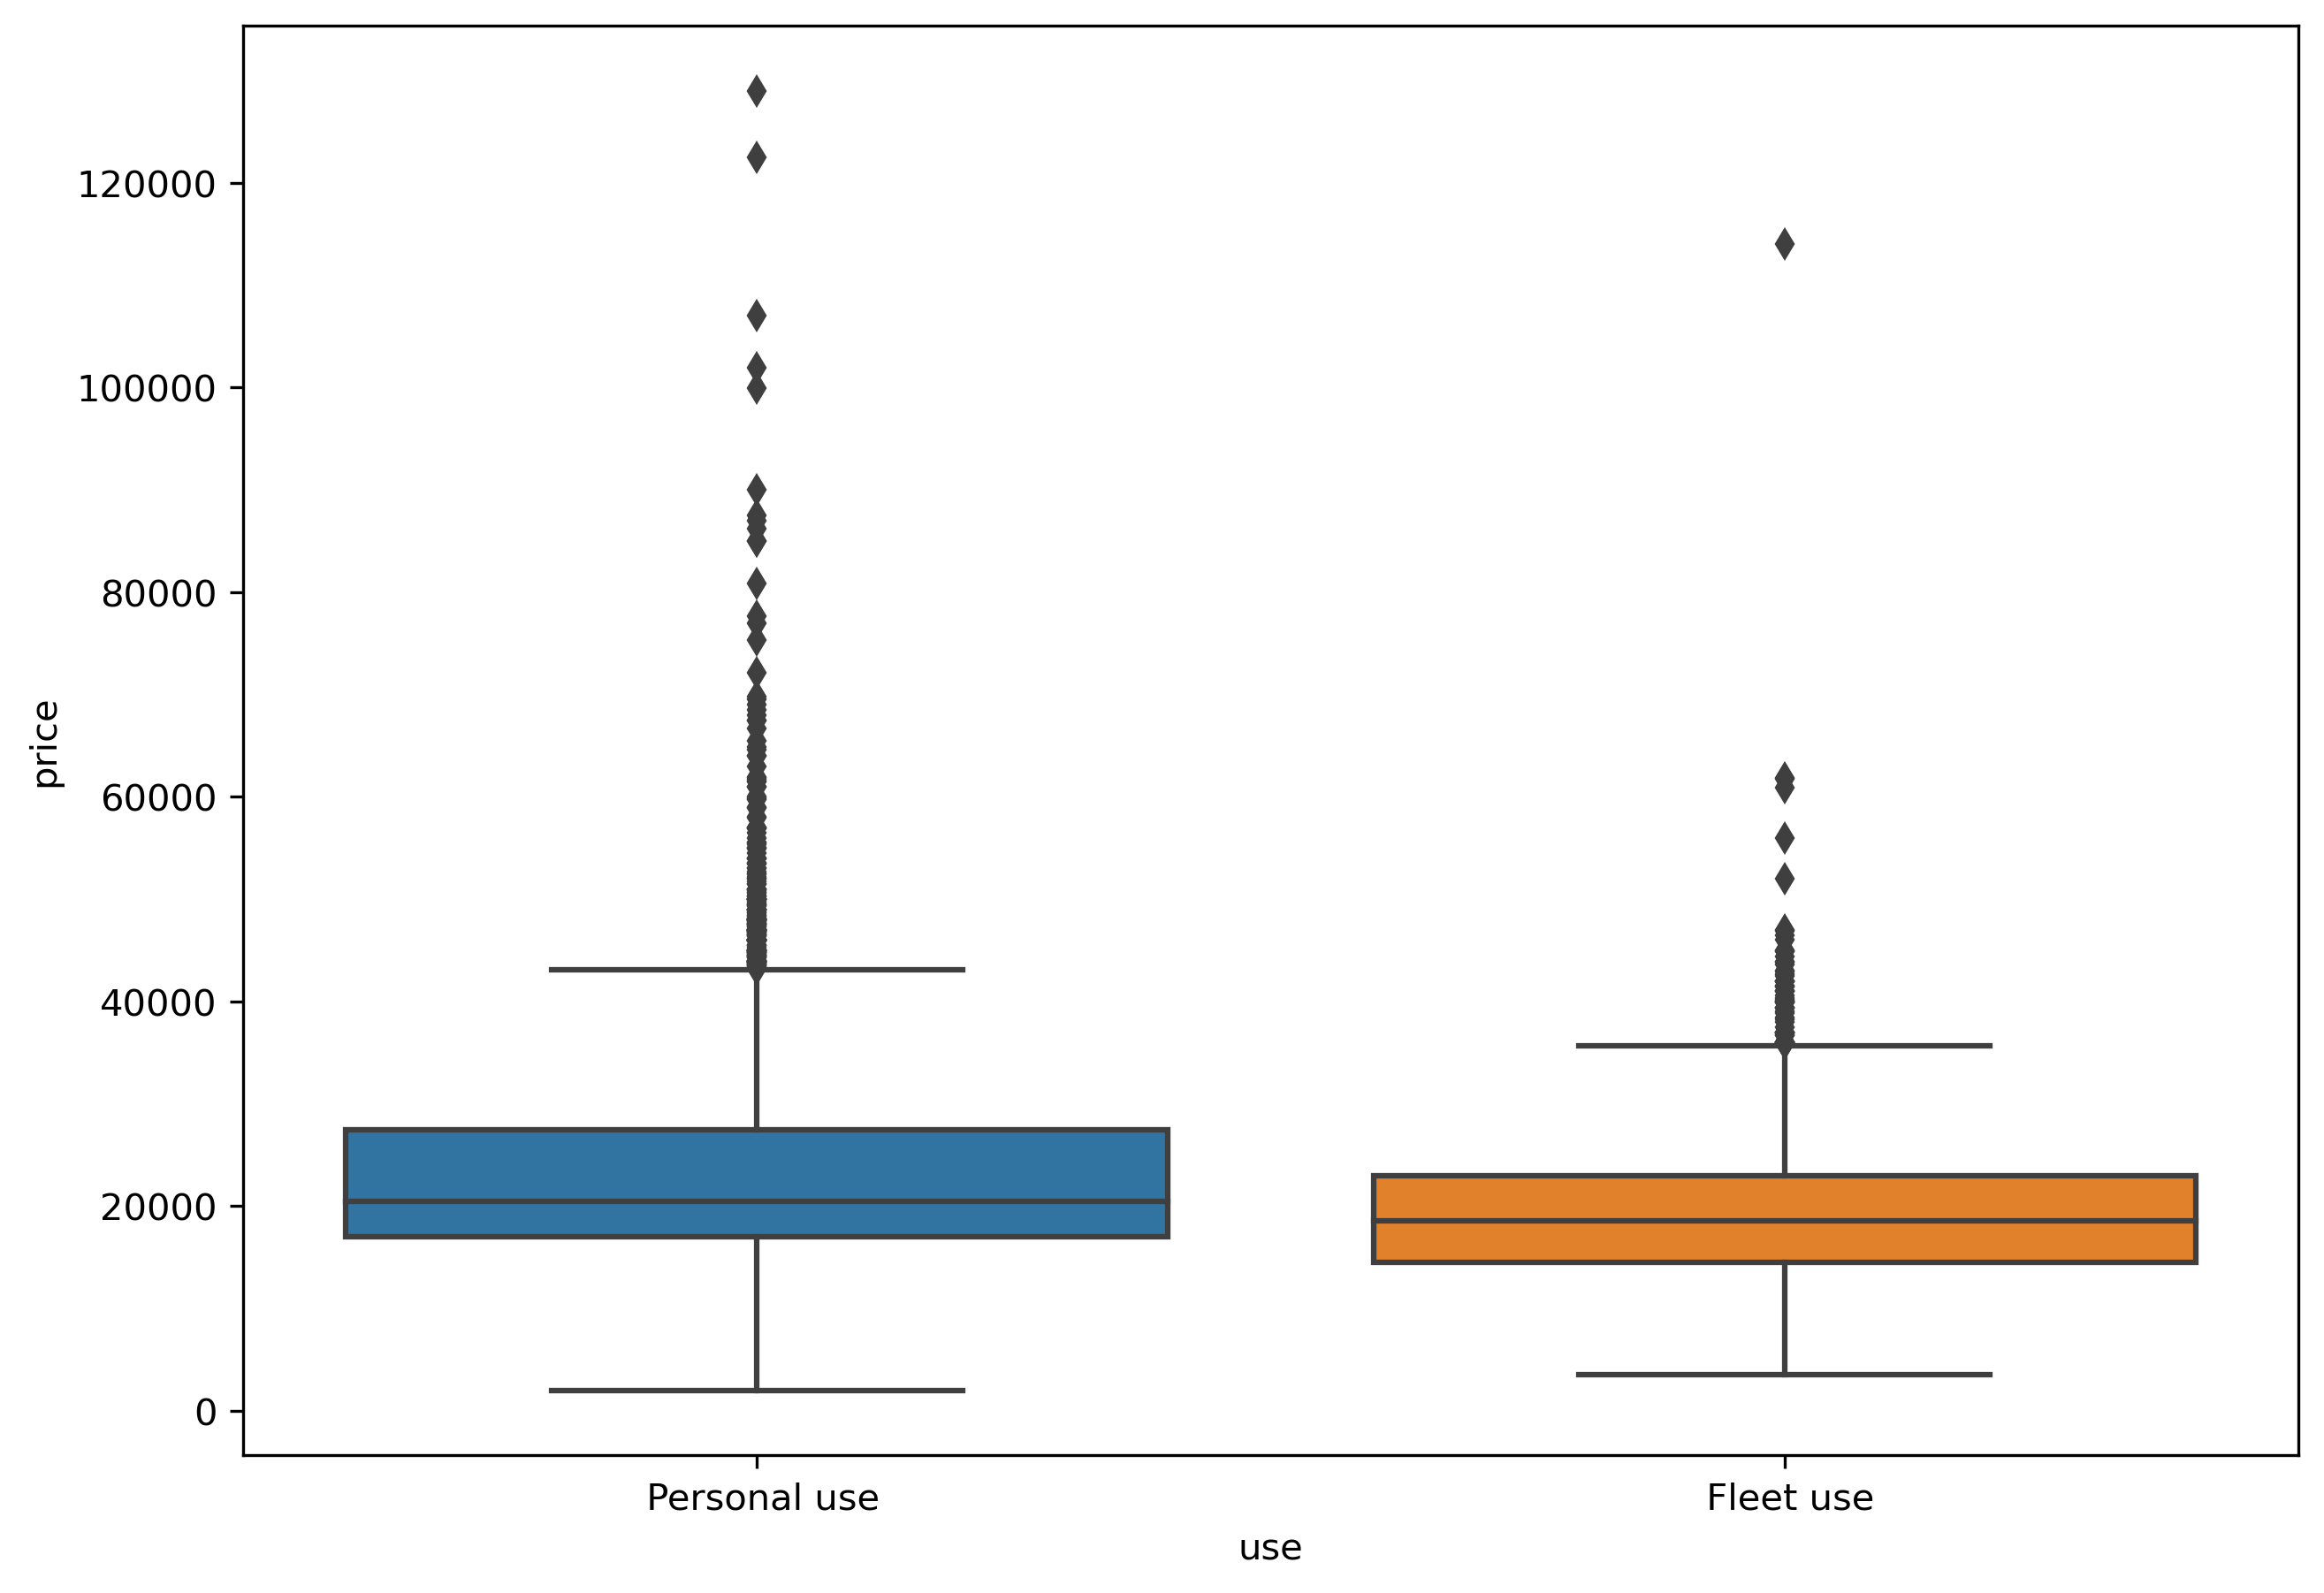

In [57]:
plt.figure(figsize=(10,7))
sns.boxplot(df2.use, df2.price)

<Figure size 12000x2100 with 0 Axes>

<AxesSubplot:xlabel='make', ylabel='price'>

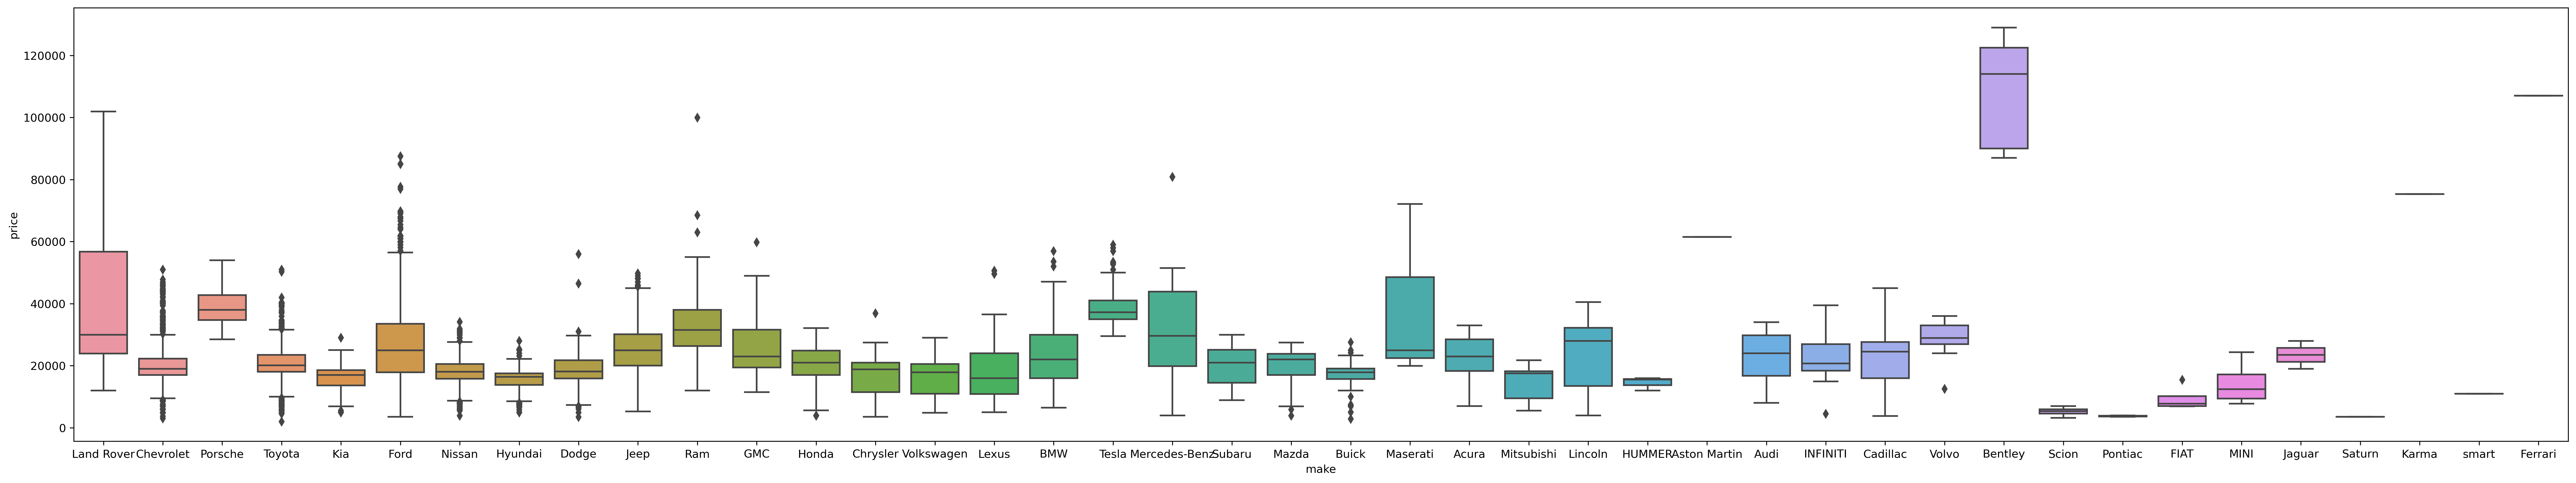

In [58]:
plt.figure(figsize=(40,7))
sns.boxplot(df2.make, df2.price)

<Figure size 3000x2100 with 0 Axes>

<AxesSubplot:xlabel='accident', ylabel='price'>

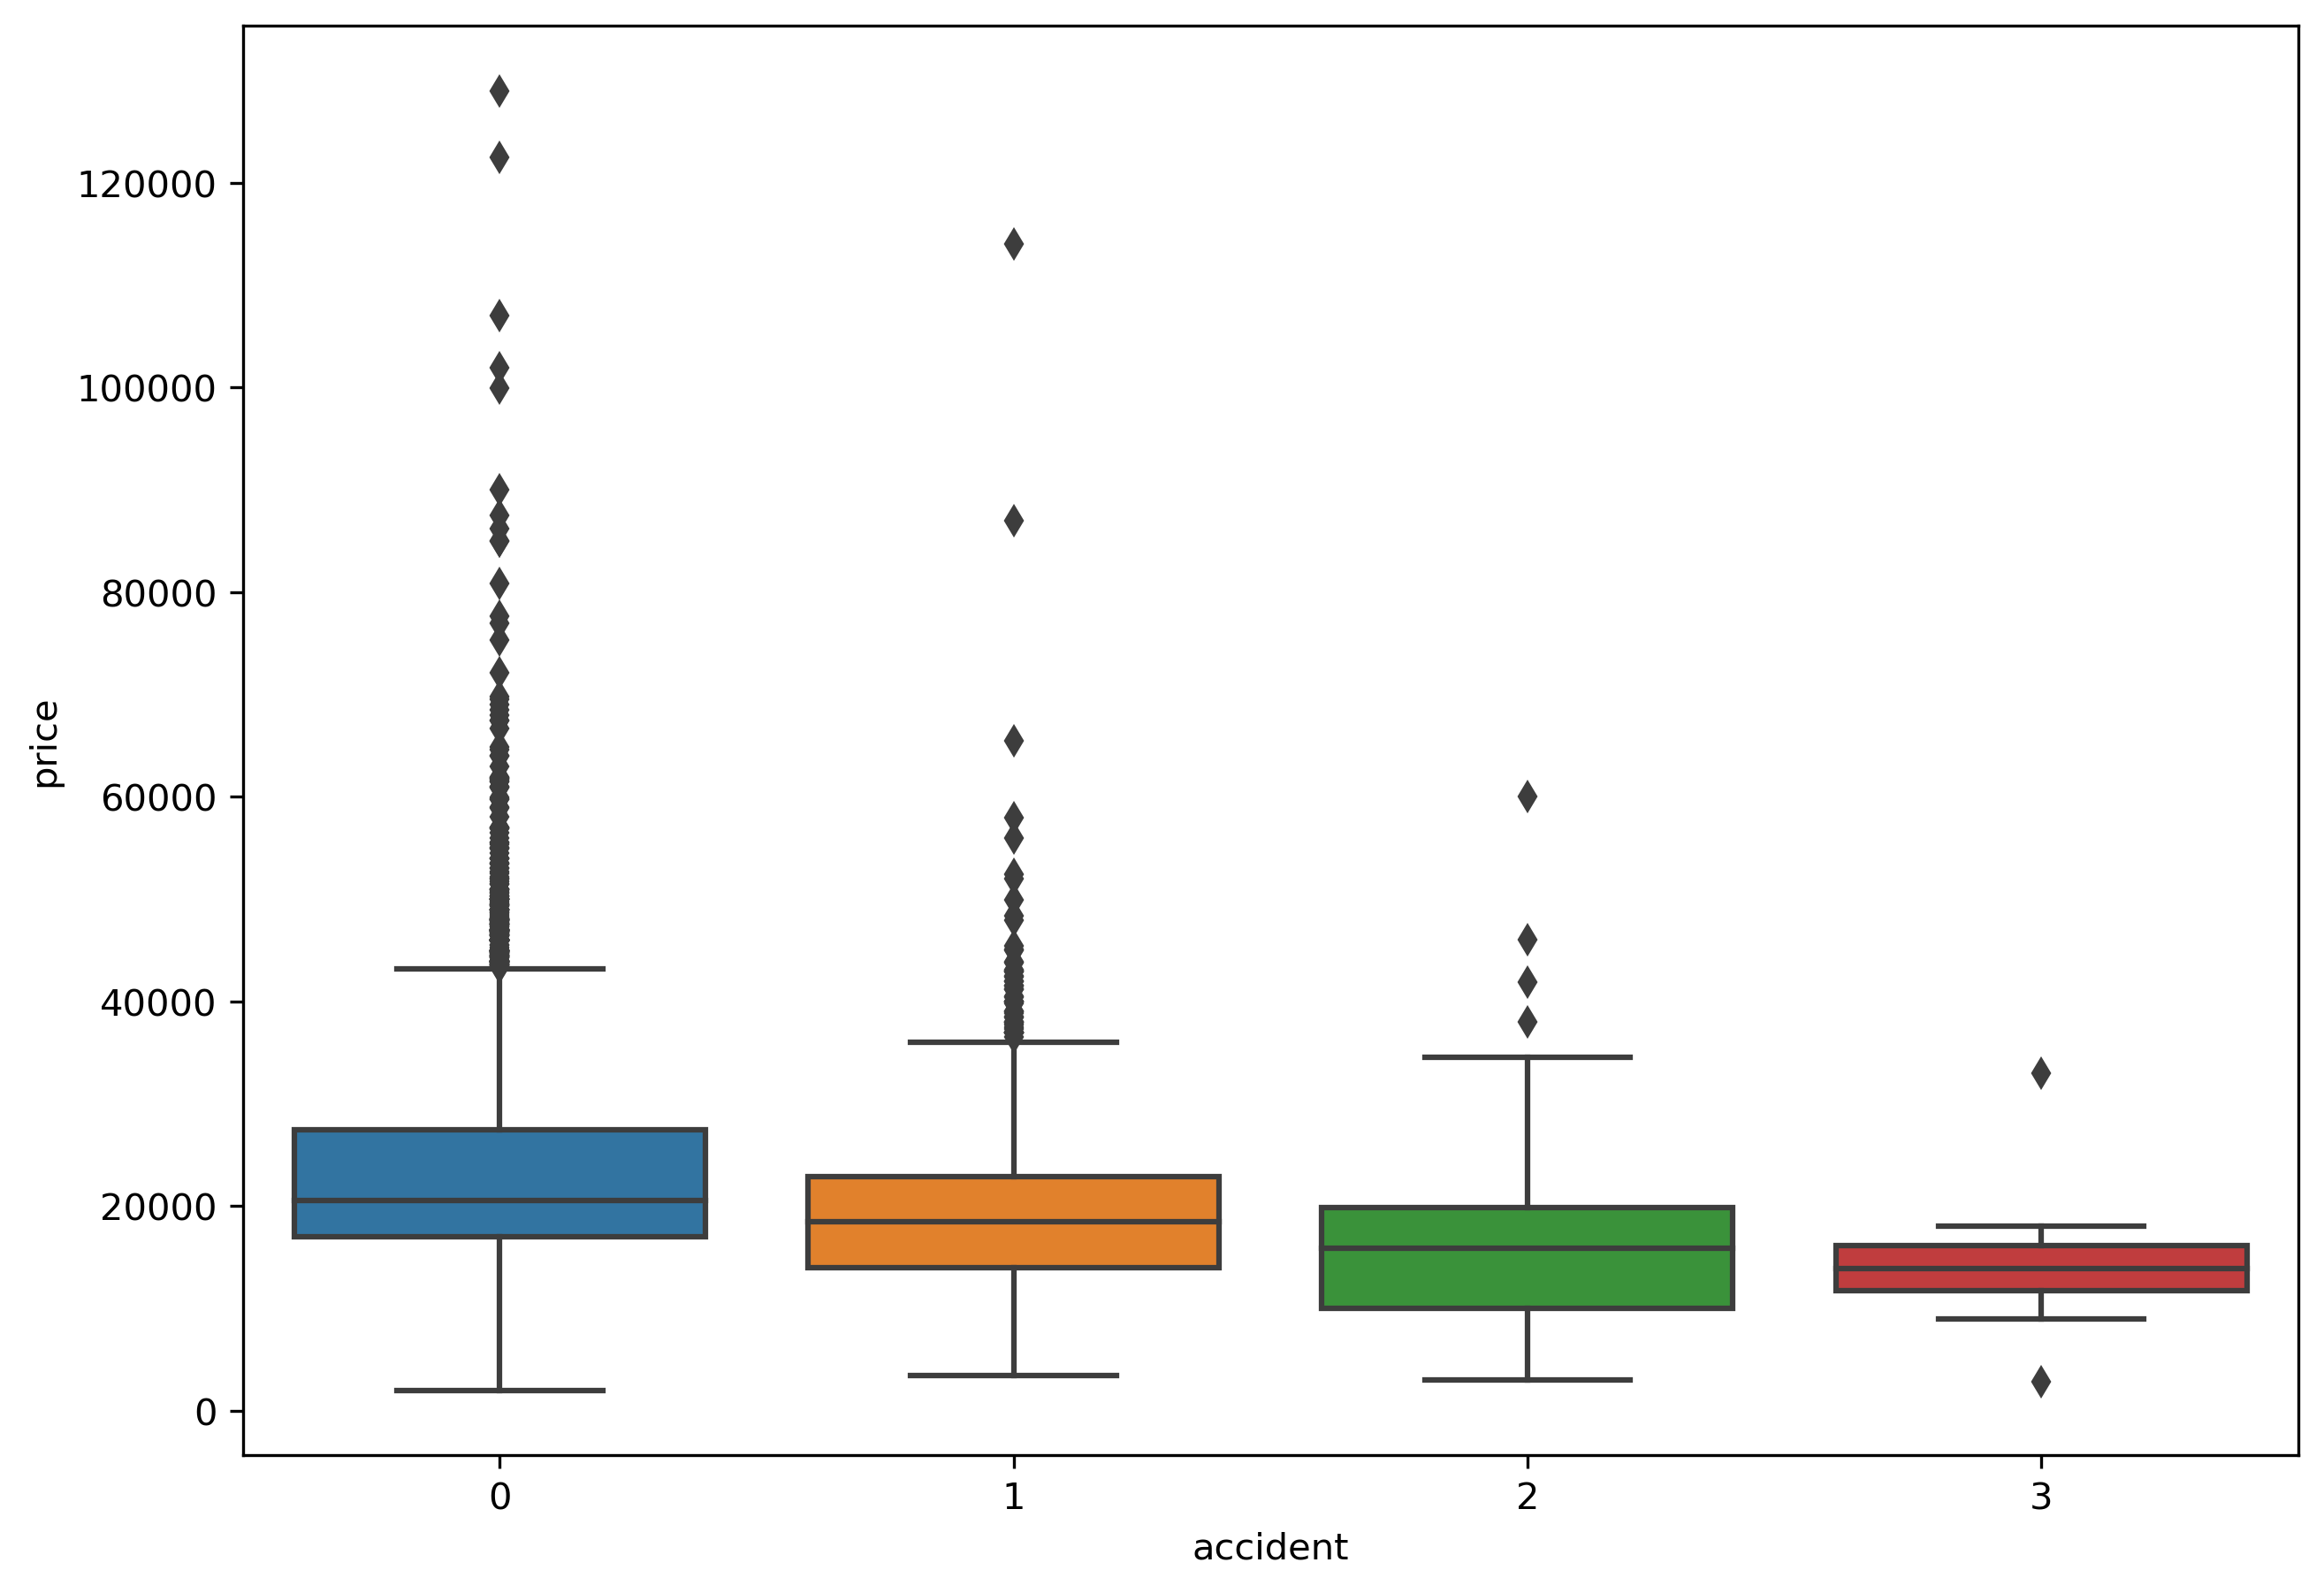

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot(df2.accident, df2.price)


# למידת מונחת  

In [60]:
# imports 
import numpy as np
import pandas as pd
from sklearn import linear_model


#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# עמודות המטרה היא עמודת המחיר

In [61]:
df2['price'].describe()

count      6334.000000
mean      22380.479318
std       10182.540316
min        2000.000000
25%       16779.750000
50%       19995.000000
75%       26592.250000
max      129000.000000
Name: price, dtype: float64

In [62]:
df2['price'].dtype

dtype('int32')

# Machine Learning
label ='price'

In [63]:
TRAINING_FEATURES = df2.columns[df2.columns != 'price'] # All columns except price column
TARGET_FEATURE    = 'price' #just price column

X = df2[TRAINING_FEATURES]
y = df2[TARGET_FEATURE]

In [64]:
X.head()

,year,make,model,km,accident,owner,use,color
0,2018,Land Rover,Discovery Sport,64126.0,0,2.0,Personal use,Silver
1,2017,Chevrolet,Cruze,119174.0,0,2.0,Personal use,Blue
2,2007,Porsche,Cayman,15565.0,0,2.0,Personal use,White
3,2019,Chevrolet,Equinox,36179.0,0,1.0,Personal use,White
4,2020,Toyota,Corolla,60821.0,0,1.0,Personal use,Black


In [65]:
y.head()

0    22288
1    14999
2    43998
3    18900
4    16823
Name: price, dtype: int32

In [66]:
from sklearn.model_selection import train_test_split

# Split data frame for train and test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#check
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #6334
Number of training samples: #5067
Number of test samples: #1267


In [69]:
X_train

,year,make,model,km,accident,owner,use,color
1167,2016,Hyundai,Accent,103254.0,0,2.0,Personal use,White
2723,2012,Honda,Accord,87621.0,1,3.0,Personal use,Silver
5600,2021,Nissan,Rogue,16562.0,0,2.0,Personal use,Red
1195,2016,Toyota,Corolla,151000.0,0,2.0,Personal use,Black
4504,2022,Toyota,Camry,11525.0,0,1.0,Personal use,Red
...,...,...,...,...,...,...,...,...
3877,2018,Audi,A4,41880.0,0,2.0,Personal use,Silver
5386,2020,Dodge,Charger,60087.0,1,1.0,Personal use,Black
5423,2019,Jeep,Compass,34649.0,0,1.0,Personal use,Gray
5595,2020,Toyota,Corolla,14085.0,0,1.0,Personal use,Red


In [70]:
X_test

,year,make,model,km,accident,owner,use,color
1391,2013,Toyota,Corolla,171625.0,1,4.0,Personal use,Gray
2133,2020,Toyota,Corolla,70139.0,0,1.0,Personal use,White
2788,2010,Toyota,Prius,127614.0,1,1.0,Personal use,White
833,2020,Chevrolet,Malibu,89593.0,0,1.0,Fleet use,Black
5053,2018,Hyundai,Tucson,129720.0,0,1.0,Personal use,White
...,...,...,...,...,...,...,...,...
1548,2018,Cadillac,XT5,49418.0,0,1.0,Personal use,Silver
58,2020,Chevrolet,Malibu,54722.0,0,2.0,Fleet use,White
6353,2014,Land Rover,Range Rover Sport,109090.0,0,2.0,Personal use,Black
3498,2019,Jeep,Cherokee,37655.0,0,1.0,Personal use,Black


In [71]:
y_test

1391     6999
2133    17278
2788     9989
833     17995
5053    13788
        ...  
1548    22995
58      17999
6353    21992
3498    23687
296     26932
Name: price, Length: 1267, dtype: int32

# scaling - רק לעמודות רציפות

In [72]:
from sklearn.preprocessing import MinMaxScaler


# select numeric features:
X_train_numeric = X_train._get_numeric_data().copy()
X_numeric_cols = X_train_numeric.columns
X_test_numeric  = X_test[X_numeric_cols].copy()

X_numeric_cols


Index(['year', 'km', 'accident', 'owner'], dtype='object')

In [73]:
X_train_numeric

,year,km,accident,owner
1167,2016,103254.0,0,2.0
2723,2012,87621.0,1,3.0
5600,2021,16562.0,0,2.0
1195,2016,151000.0,0,2.0
4504,2022,11525.0,0,1.0
...,...,...,...,...
3877,2018,41880.0,0,2.0
5386,2020,60087.0,1,1.0
5423,2019,34649.0,0,1.0
5595,2020,14085.0,0,1.0


In [74]:
X_test_numeric

,year,km,accident,owner
1391,2013,171625.0,1,4.0
2133,2020,70139.0,0,1.0
2788,2010,127614.0,1,1.0
833,2020,89593.0,0,1.0
5053,2018,129720.0,0,1.0
...,...,...,...,...
1548,2018,49418.0,0,1.0
58,2020,54722.0,0,2.0
6353,2014,109090.0,0,2.0
3498,2019,37655.0,0,1.0


In [75]:
scaler = MinMaxScaler()# MinMaxScaler
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_numeric_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.fit_transform(X_test_numeric), columns=X_numeric_cols, index=X_test.index)
X_train_scaled.head()

,year,km,accident,owner
1167,0.750000,0.312322,0.000000,0.090909
2723,0.583333,0.264805,0.333333,0.181818
5600,0.958333,0.048821,0.000000,0.090909
1195,0.750000,0.457447,0.000000,0.090909
4504,1.000000,0.033511,0.000000,0.000000


# Encoding - discrete features= המרת עמודות קטגוריאליות למספרים


In [76]:
X.select_dtypes('object')

,make,model,use,color
0,Land Rover,Discovery Sport,Personal use,Silver
1,Chevrolet,Cruze,Personal use,Blue
2,Porsche,Cayman,Personal use,White
3,Chevrolet,Equinox,Personal use,White
4,Toyota,Corolla,Personal use,Black
...,...,...,...,...
6598,GMC,Sierra 1500,Personal use,White
6599,Dodge,Grand Caravan,Personal use,Silver
6600,Toyota,Camry Solara,Personal use,White
6601,Volkswagen,Passat,Personal use,Gray


In [77]:
X_discrete = X.select_dtypes('object').copy()
X_discrete_encoded = pd.get_dummies(X_discrete, prefix_sep="__") 

X_train_discrete_encoded = X_discrete_encoded.loc[X_train.index,:]
X_test_discrete_encoded = X_discrete_encoded.loc[X_test.index,:]
X_train_discrete_encoded.head()

,make__Acura,make__Aston Martin,make__Audi,make__BMW,make__Bentley,make__Buick,make__Cadillac,make__Chevrolet,make__Chrysler,make__Dodge,...,color__Gray,color__Green,color__Maroon,color__Orange,color__Purple,color__Red,color__Silver,color__Tan,color__White,color__Yellow
1167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Merge the scaled and encoded features¶

In [78]:
X_train_processed = pd.concat((X_train_scaled, X_train_discrete_encoded), axis=1) #concat merge them
X_test_processed = pd.concat((X_test_scaled, X_test_discrete_encoded), axis=1)

In [79]:
X_train_processed.head()

,year,km,accident,owner,make__Acura,make__Aston Martin,make__Audi,make__BMW,make__Bentley,make__Buick,...,color__Gray,color__Green,color__Maroon,color__Orange,color__Purple,color__Red,color__Silver,color__Tan,color__White,color__Yellow
1167,0.750000,0.312322,0.000000,0.090909,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2723,0.583333,0.264805,0.333333,0.181818,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5600,0.958333,0.048821,0.000000,0.090909,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1195,0.750000,0.457447,0.000000,0.090909,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4504,1.000000,0.033511,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
X_train_processed.columns

Index(['year', 'km', 'accident', 'owner', 'make__Acura', 'make__Aston Martin',
       'make__Audi', 'make__BMW', 'make__Bentley', 'make__Buick',
       ...
       'color__Gray', 'color__Green', 'color__Maroon', 'color__Orange',
       'color__Purple', 'color__Red', 'color__Silver', 'color__Tan',
       'color__White', 'color__Yellow'],
      dtype='object', length=365)

In [81]:
X_test_processed.head()

,year,km,accident,owner,make__Acura,make__Aston Martin,make__Audi,make__BMW,make__Bentley,make__Buick,...,color__Gray,color__Green,color__Maroon,color__Orange,color__Purple,color__Red,color__Silver,color__Tan,color__White,color__Yellow
1391,0.590909,0.689370,0.333333,0.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2133,0.909091,0.279714,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2788,0.454545,0.511716,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
833,0.909091,0.358242,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5053,0.818182,0.520217,0.000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
X_test_processed.columns

Index(['year', 'km', 'accident', 'owner', 'make__Acura', 'make__Aston Martin',
       'make__Audi', 'make__BMW', 'make__Bentley', 'make__Buick',
       ...
       'color__Gray', 'color__Green', 'color__Maroon', 'color__Orange',
       'color__Purple', 'color__Red', 'color__Silver', 'color__Tan',
       'color__White', 'color__Yellow'],
      dtype='object', length=365)

# Dimensionality Reduction= צמצום כמות עמודות 

In [83]:
print("Num Features Pre-PCA:", X_train_processed.shape[1])
pca = PCA(0.9)
X_train_reduced = pca.fit_transform(X_train_processed)
X_test_reduced  = pca.transform(X_test_processed)

print("Num Features Post-PCA:", X_train_reduced.shape[1])



Num Features Pre-PCA: 365
Num Features Post-PCA: 48


# נשתמש ברגרסיה ליניארית מאחר והתווית היא רציפה

# Train a Linear Regression model.

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_reduced, y_train)

LinearRegression()

# Measure the performance with R^2

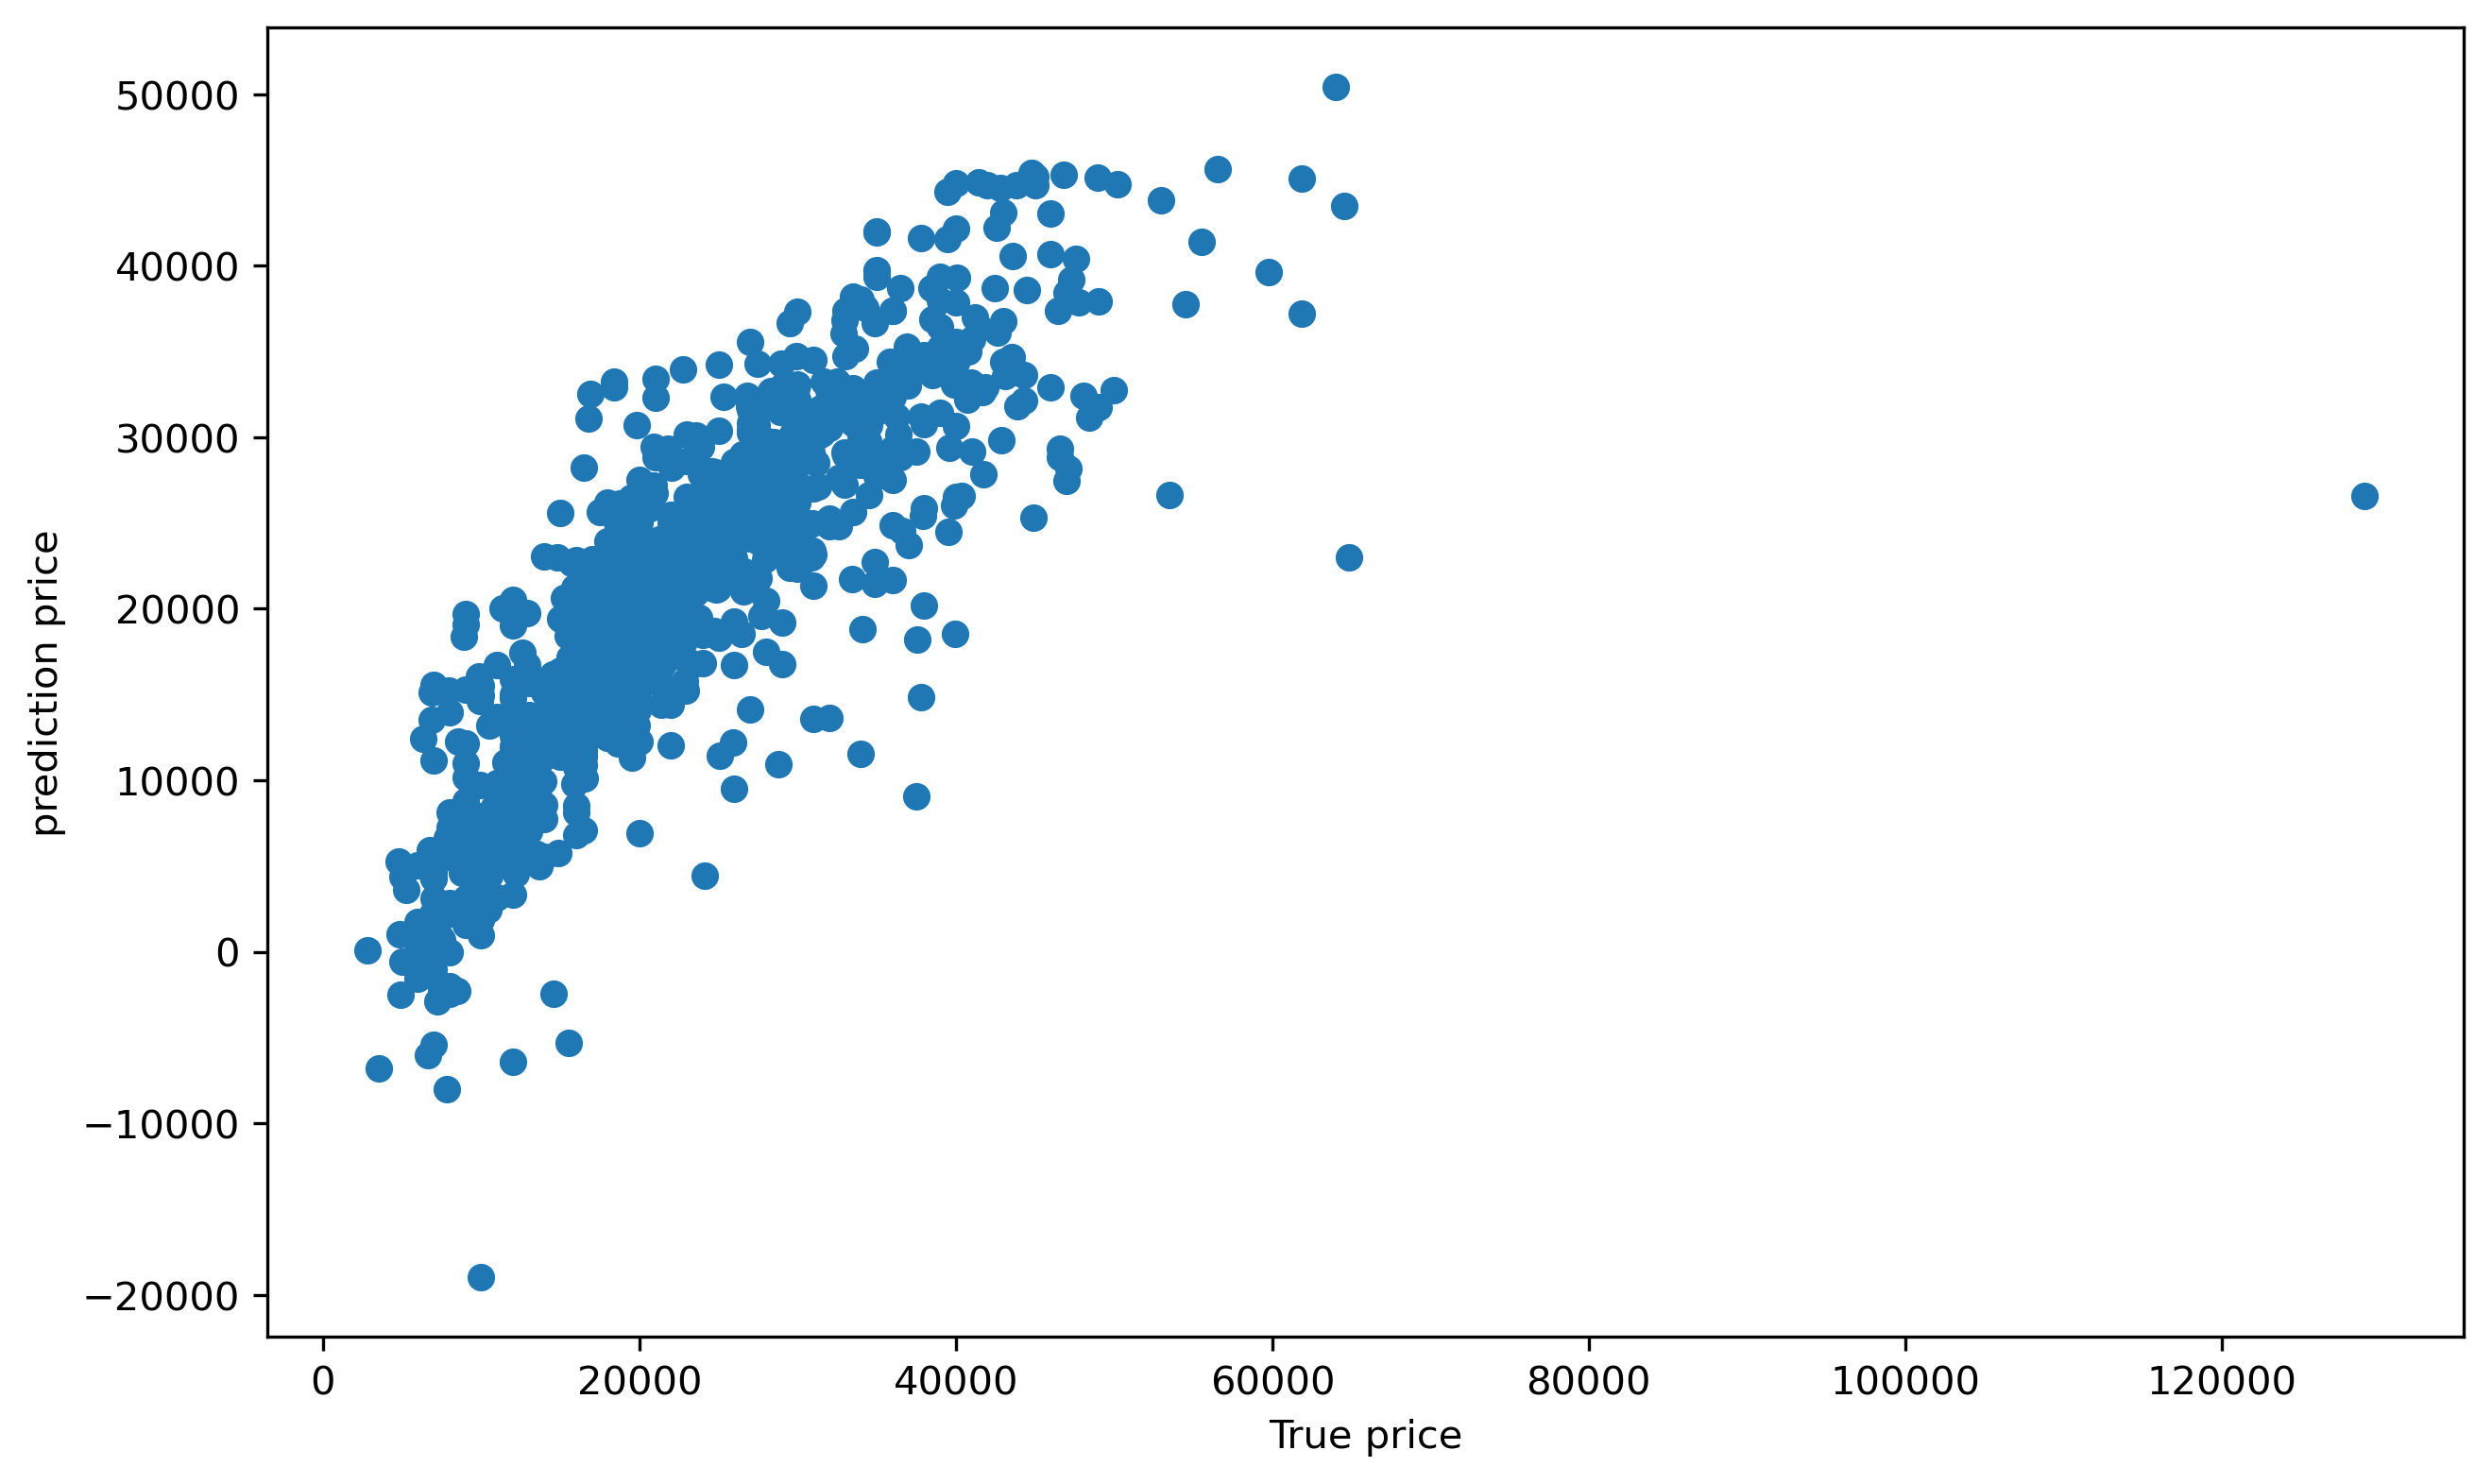

R^2 :  0.6080010668756188


In [87]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score

def describe_output_for_model(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("True price")
    plt.ylabel("prediction price")
    plt.show()
    print("R^2 : ", r2_score(y_test, y_pred)) # closer to 1 , the better
  

describe_output_for_model(model, X_test_reduced, y_test)


# R^2 :  0.6080010668756188 -it's good :)

#  Rejoin the dataset
Join X_train_processed and y_train to one dataframe, where y_train will become the column 'price'
Do the same for the testset

In [88]:

trainset = X_train_processed.copy(deep=True)
trainset['price'] = y_train
testset  = X_test_processed.copy(deep=True)
testset['price'] = y_test
trainset.head()

,year,km,accident,owner,make__Acura,make__Aston Martin,make__Audi,make__BMW,make__Bentley,make__Buick,...,color__Green,color__Maroon,color__Orange,color__Purple,color__Red,color__Silver,color__Tan,color__White,color__Yellow,price
1167,0.750000,0.312322,0.000000,0.090909,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7450
2723,0.583333,0.264805,0.333333,0.181818,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,11639
5600,0.958333,0.048821,0.000000,0.090909,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,24648
1195,0.750000,0.457447,0.000000,0.090909,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10689
4504,1.000000,0.033511,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,24898
